<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span><ul class="toc-item"><li><span><a href="#Librairies" data-toc-modified-id="Librairies-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fonctions</a></span></li><li><span><a href="#Données" data-toc-modified-id="Données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Données</a></span></li></ul></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration</a></span><ul class="toc-item"><li><span><a href="#Générale" data-toc-modified-id="Générale-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Générale</a></span></li><li><span><a href="#Distribution-des-données" data-toc-modified-id="Distribution-des-données-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distribution des données</a></span></li><li><span><a href="#Graphiques-temporels" data-toc-modified-id="Graphiques-temporels-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Graphiques temporels</a></span></li><li><span><a href="#Corrélation-des-données" data-toc-modified-id="Corrélation-des-données-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Corrélation des données</a></span></li></ul></li><li><span><a href="#Mise-en-oeuvre-du-RFM" data-toc-modified-id="Mise-en-oeuvre-du-RFM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mise en oeuvre du RFM</a></span><ul class="toc-item"><li><span><a href="#Récupération-des-données" data-toc-modified-id="Récupération-des-données-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Récupération des données</a></span></li><li><span><a href="#Création-des-colonnes-RFM" data-toc-modified-id="Création-des-colonnes-RFM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Création des colonnes RFM</a></span></li><li><span><a href="#Calcul-du-Score" data-toc-modified-id="Calcul-du-Score-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Calcul du Score</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Fusion-des-données" data-toc-modified-id="Fusion-des-données-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fusion des données</a></span><ul class="toc-item"><li><span><a href="#Calcul-de-la-dernière-note-donnée" data-toc-modified-id="Calcul-de-la-dernière-note-donnée-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Calcul de la dernière note donnée</a></span></li><li><span><a href="#Récupération-de-la-date-de-la-dernière-commande" data-toc-modified-id="Récupération-de-la-date-de-la-dernière-commande-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Récupération de la date de la dernière commande</a></span></li></ul></li><li><span><a href="#Regroupement-par-customers" data-toc-modified-id="Regroupement-par-customers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Regroupement par customers</a></span></li><li><span><a href="#Sauvegarde-du-tableau" data-toc-modified-id="Sauvegarde-du-tableau-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sauvegarde du tableau</a></span></li></ul></li></ul></div>

# Import
## Librairies

In [74]:
# Data
import pandas as pd
import numpy as np

#Date
import datetime

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Imputer
from sklearn.impute import SimpleImputer

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Compose
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

# Decompostion
from sklearn.decomposition import PCA

# Warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Fonctions

## Données

In [75]:
# Récupération des données des clients
customers_data = pd.read_csv("../Data/olist_customers_dataset.csv")
customers_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [76]:
# Récupération des données de géolocalisation
geolocation_data = pd.read_csv("../Data/olist_geolocation_dataset.csv")
geolocation_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [77]:
# Création d'un parseur de Date pour récupérer les Années, Mois et Jours
dateparse = lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S').date()

# Récupération des données des items
items_data = pd.read_csv("../Data/olist_order_items_dataset.csv",
                         parse_dates=["shipping_limit_date"],
                         date_parser=dateparse)
items_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14


In [78]:
# Récupération des données des paiements
payments_data = pd.read_csv("../Data/olist_order_payments_dataset.csv")
payments_data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [79]:
# Récupération des données des notations
reviews_data = pd.read_csv(
    "../Data/olist_order_reviews_dataset.csv",
    parse_dates=["review_creation_date", "review_answer_timestamp"],
    date_parser=dateparse)
reviews_data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02


In [80]:
# Récupération des données des commandes
orders_data = pd.read_csv("../Data/olist_orders_dataset.csv",
                          parse_dates=[
                              "order_purchase_timestamp", "order_approved_at",
                              "order_delivered_carrier_date",
                              "order_delivered_customer_date",
                              "order_estimated_delivery_date"
                          ],
                          date_parser=dateparse)
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26


In [81]:
# Récupération des données des produits
products_data = pd.read_csv("../Data/olist_products_dataset.csv")
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [82]:
# Récupération des données des vendeurs
sellers_data = pd.read_csv("../Data/olist_sellers_dataset.csv")
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [83]:
# Récupération des données des traductions des catégories de produits
translation_data = pd.read_csv("../Data/product_category_name_translation.csv")
translation_data.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Exploration
## Générale

In [84]:
# Création d'une liste avec tous les DataFrame
list_df = [
    customers_data, geolocation_data, items_data, payments_data, reviews_data,
    orders_data, products_data, sellers_data, translation_data
]

# Création d'une liste avec leurs noms
list_noms = [
    "Customers", "Geolocation", "Items", "Payments", "Reviews", "Orders",
    "Products", "Sellers", "Translation"
]

# Boucle pour afficher les types des colonnes pour chaque DataFrame
for i, df in enumerate(list_df):
    print(f"Table {list_noms[i]} :\n{df.dtypes}", "\n\n")

Table Customers :
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object 


Table Geolocation :
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object 


Table Items :
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object 


Table Payments :
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object 


Table Reviews :
review_id                          object
order_id 

In [85]:
# Boucle pour afficher la taille de chaque DataFrame
for i, df in enumerate(list_df):
    print(f"Table {list_noms[i]} :\n{df.shape}", "\n\n")

Table Customers :
(99441, 5) 


Table Geolocation :
(1000163, 5) 


Table Items :
(112650, 7) 


Table Payments :
(103886, 5) 


Table Reviews :
(99224, 7) 


Table Orders :
(99441, 8) 


Table Products :
(32951, 9) 


Table Sellers :
(3095, 4) 


Table Translation :
(71, 2) 




In [86]:
# Boucle pour afficher les colonnes avec des données vides
for i, df in enumerate(list_df):
    print(f"Table {list_noms[i]} :\n{df.isnull().mean()}", "\n\n")

Table Customers :
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64 


Table Geolocation :
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64 


Table Items :
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64 


Table Payments :
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64 


Table Reviews :
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025

In [87]:
# Boucle qui affiches les duplicatas pour chaque DataFrame
for i, df in enumerate(list_df):
    print(f"Table {list_noms[i]} :\n{df.duplicated().sum()}", "\n\n")

Table Customers :
0 


Table Geolocation :
261831 


Table Items :
0 


Table Payments :
0 


Table Reviews :
0 


Table Orders :
0 


Table Products :
0 


Table Sellers :
0 


Table Translation :
0 




In [105]:
# Boucle qui affiches les nombre de valeurs uniques dans chaque colonne pour chaque DataFrame
for i, df in enumerate(list_df):
    print(f"Table {list_noms[i]} :\n{df.nunique()}", "\n\n")

Table Customers :
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64 


Table Geolocation :
geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64 


Table Items :
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date      555
price                   5968
freight_value           6999
dtype: int64 


Table Payments :
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64 


Table Reviews :
review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review

In [88]:
# Suppression des duplicatats du DataFrame de géolocalisation
geolocation_data = geolocation_data[~(geolocation_data.duplicated())]
geolocation_data.shape

(738332, 5)

In [104]:
orders_data.loc[
    (orders_data["order_approved_at"].isnull()) &
    (orders_data["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18,NaT,2017-02-23,2017-03-01,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18,NaT,2017-02-23,2017-03-02,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18,NaT,2017-02-22,2017-03-01,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18,NaT,2017-02-22,2017-03-09,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17,NaT,2017-02-22,2017-03-02,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19,NaT,2017-01-25,2017-01-30,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19,NaT,2017-02-23,2017-03-02,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18,NaT,2017-02-23,2017-03-02,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19,NaT,2017-01-27,2017-02-06,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17,NaT,2017-02-22,2017-03-03,2017-03-20


In [16]:
reviews_data[reviews_data["order_id"].duplicated(
    keep=False)].sort_values("order_id")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29,2017-08-30
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25,2017-08-29
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22,2018-02-23
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04,2018-03-05
854,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30,2018-01-02
...,...,...,...,...,...,...,...
27465,5e78482ee783451be6026e5cf0c72de1,ff763b73e473d03c321bcd5a053316e8,3,NaN,Não sei que haverá acontecido os demais chegaram,2017-11-18,2017-11-18
41355,39de8ad3a1a494fc68cc2d5382f052f4,ff850ba359507b996e8b2fbb26df8d03,5,NaN,Envio rapido... Produto 100%,2017-08-16,2017-08-17
18783,80f25f32c00540d49d57796fb6658535,ff850ba359507b996e8b2fbb26df8d03,5,NaN,"Envio rapido, produto conforme descrito no anu...",2017-08-22,2017-08-25
92230,870d856a4873d3a67252b0c51d79b950,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20,2017-12-20


## Distribution des données

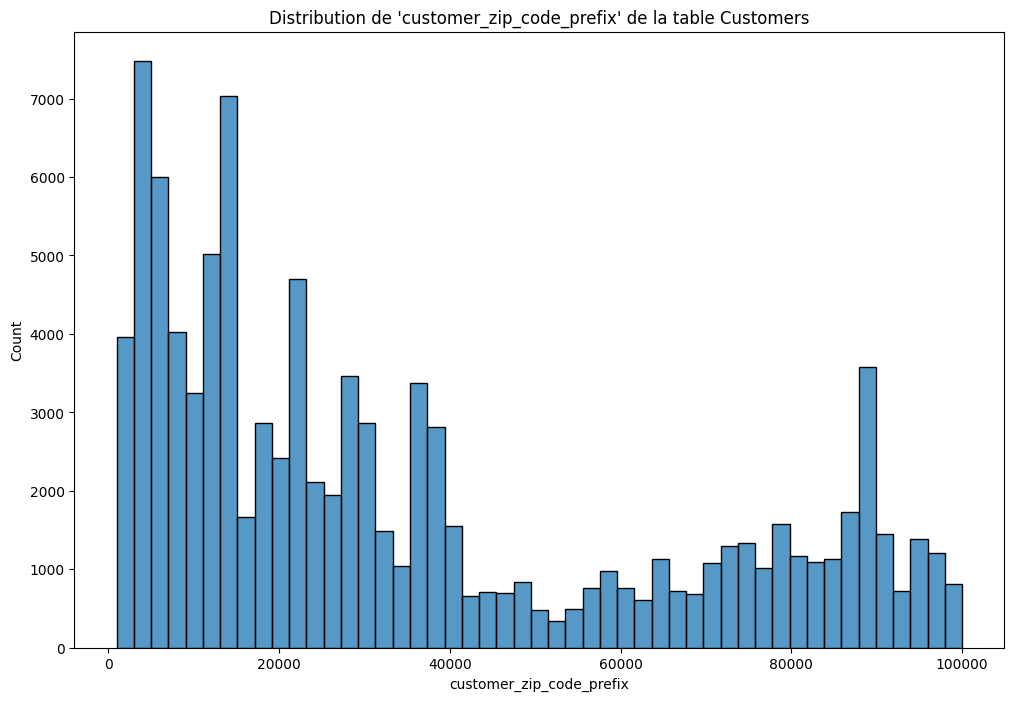

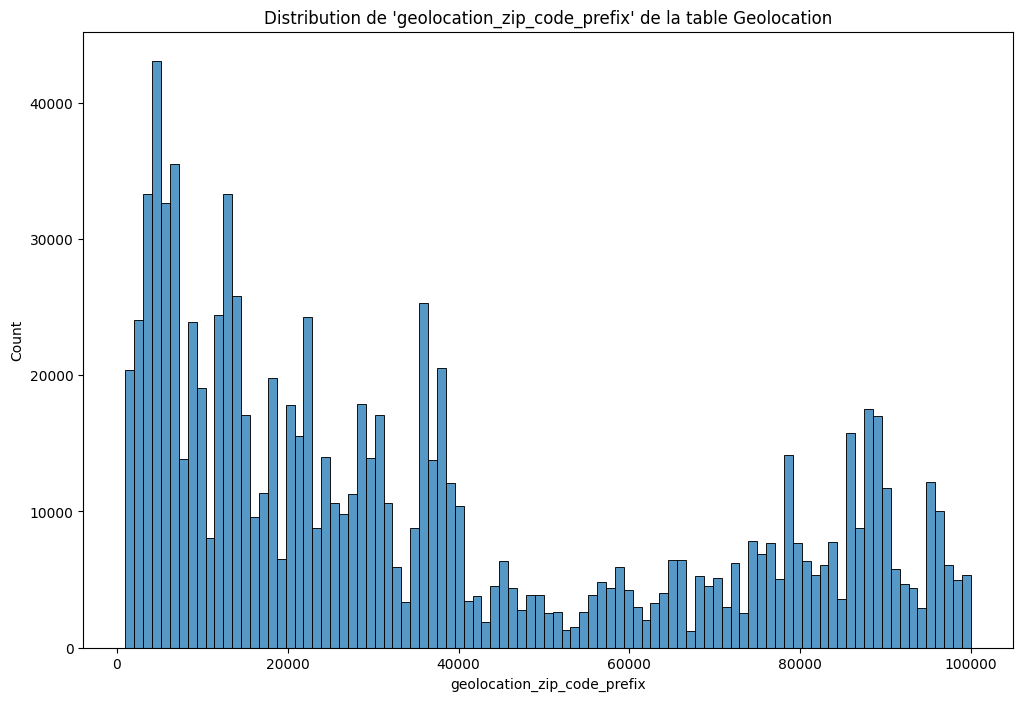

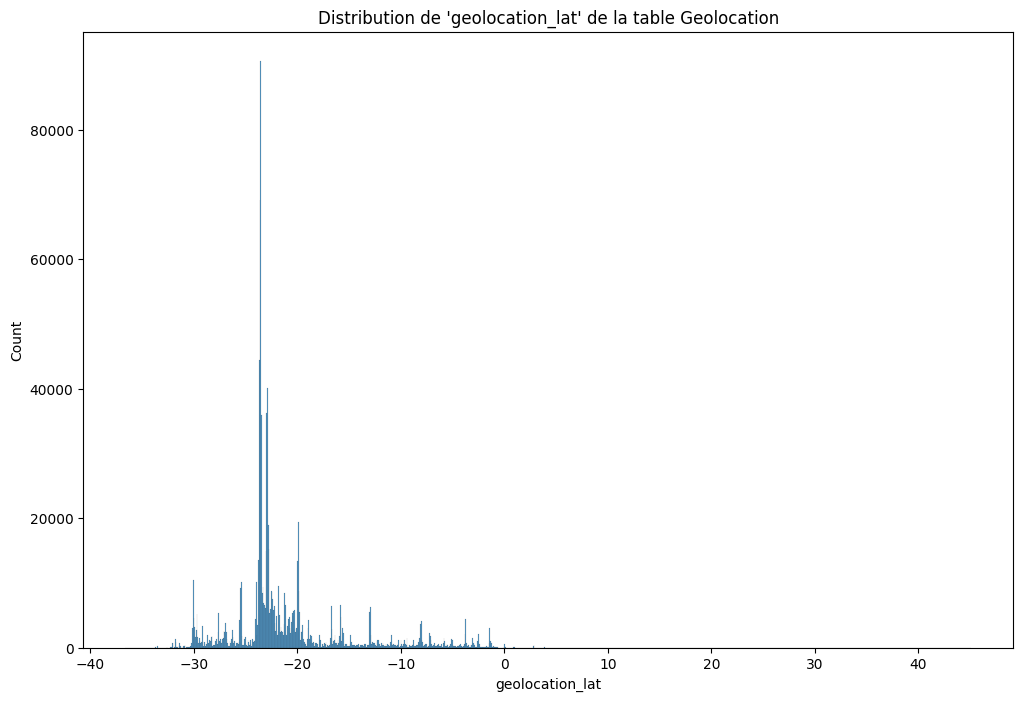

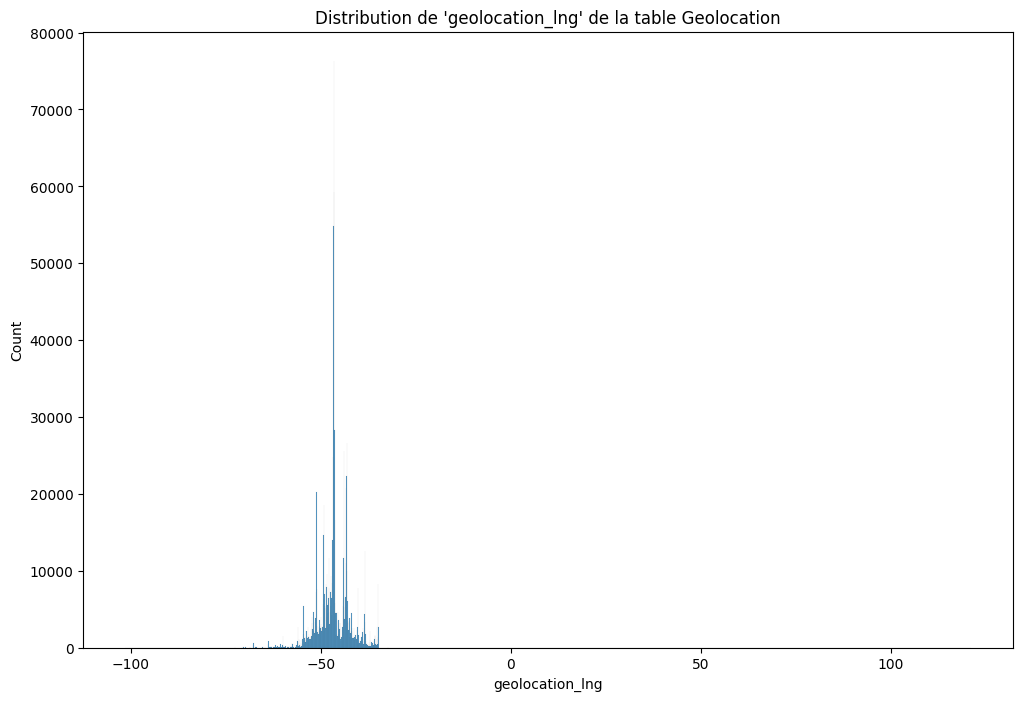

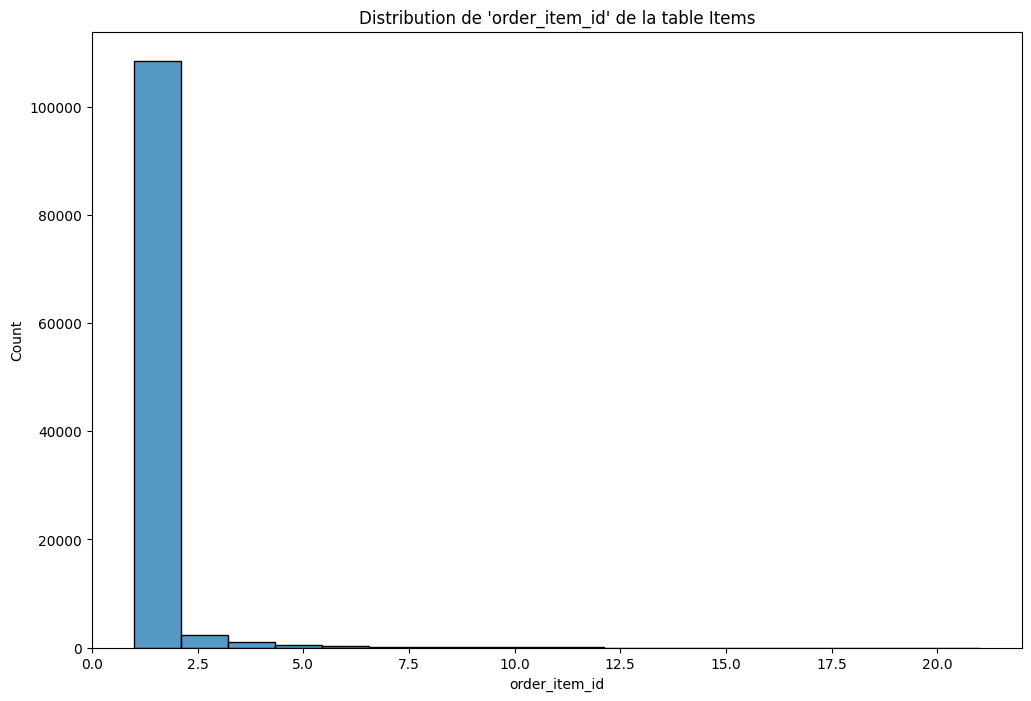

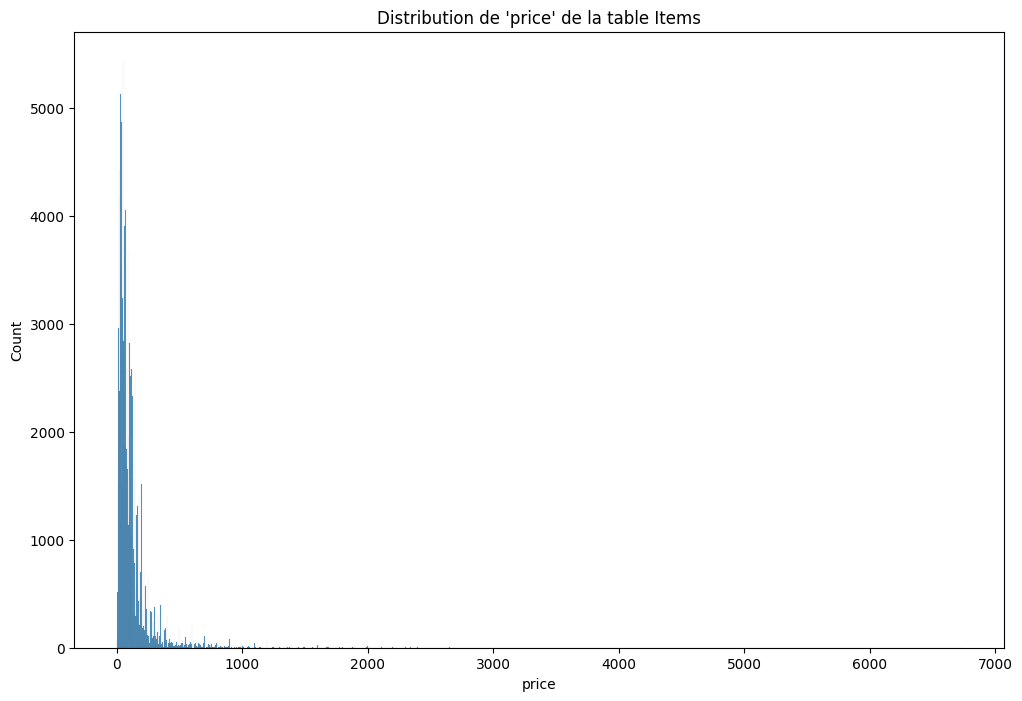

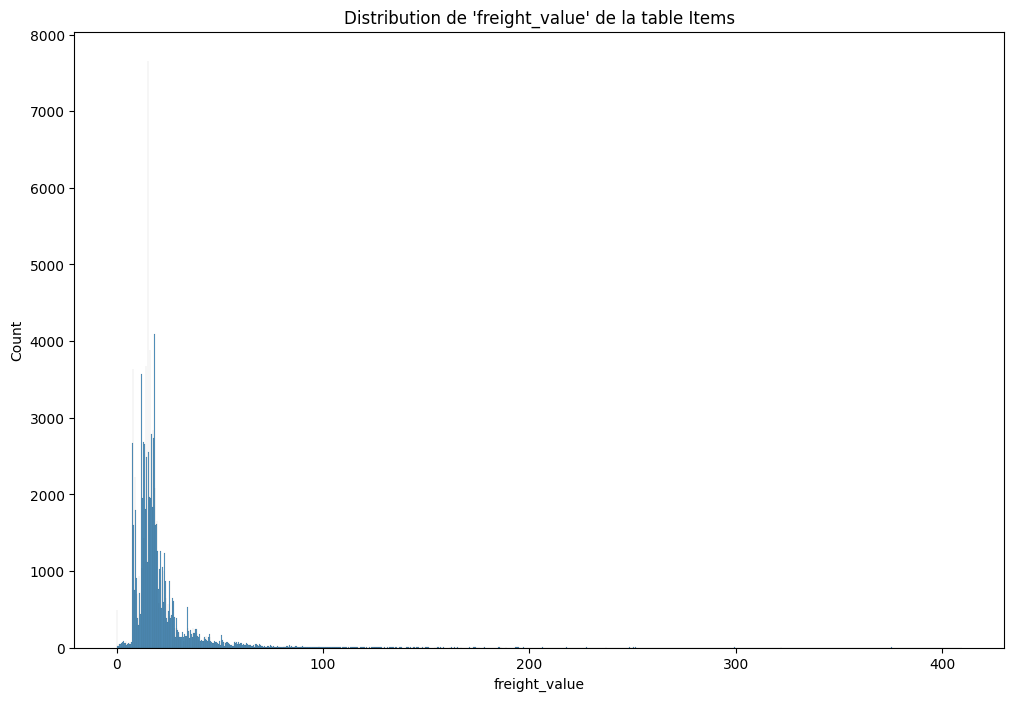

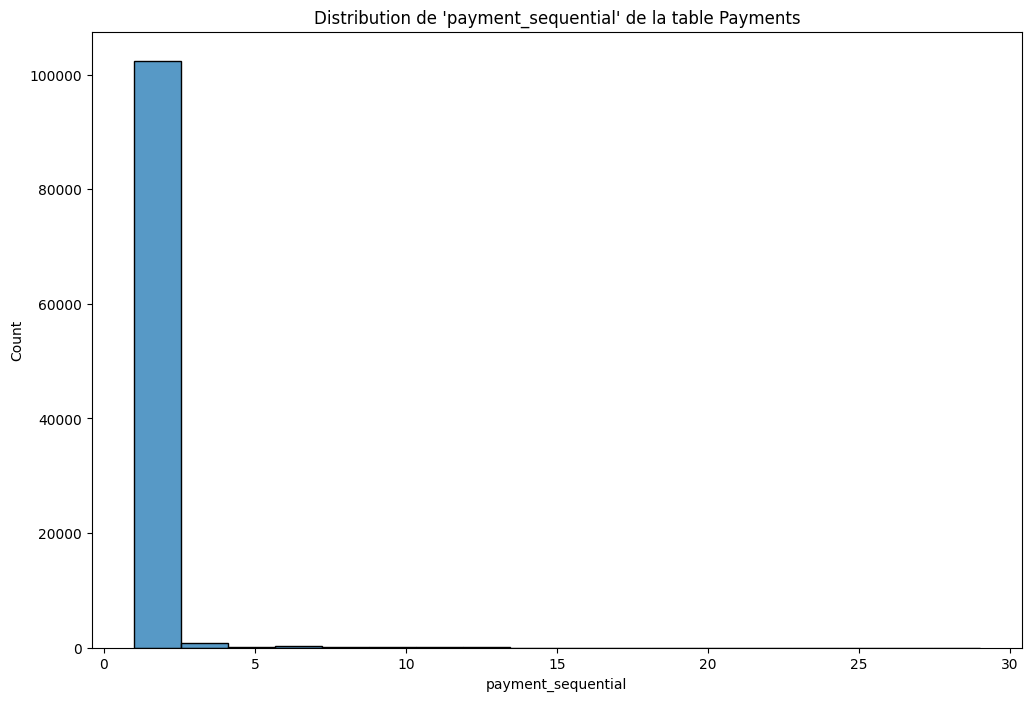

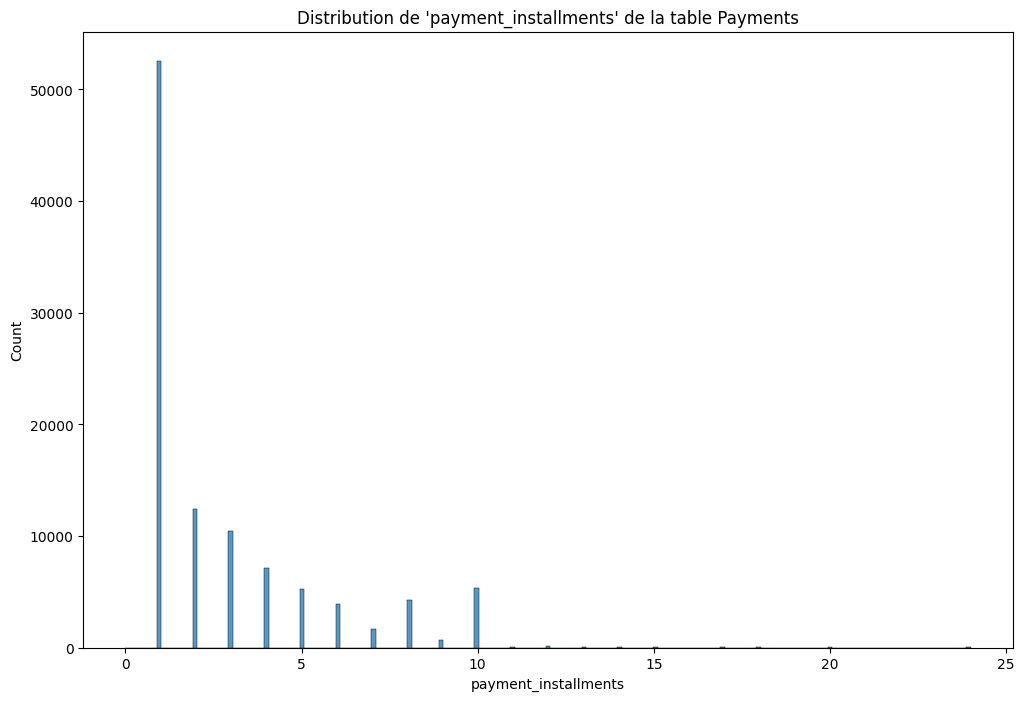

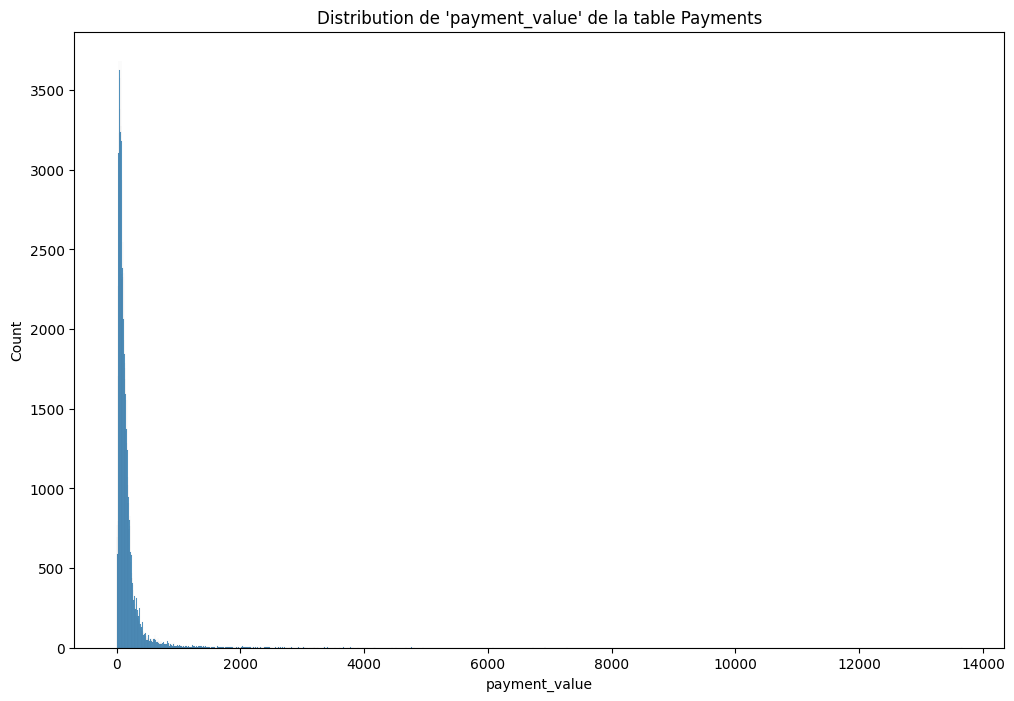

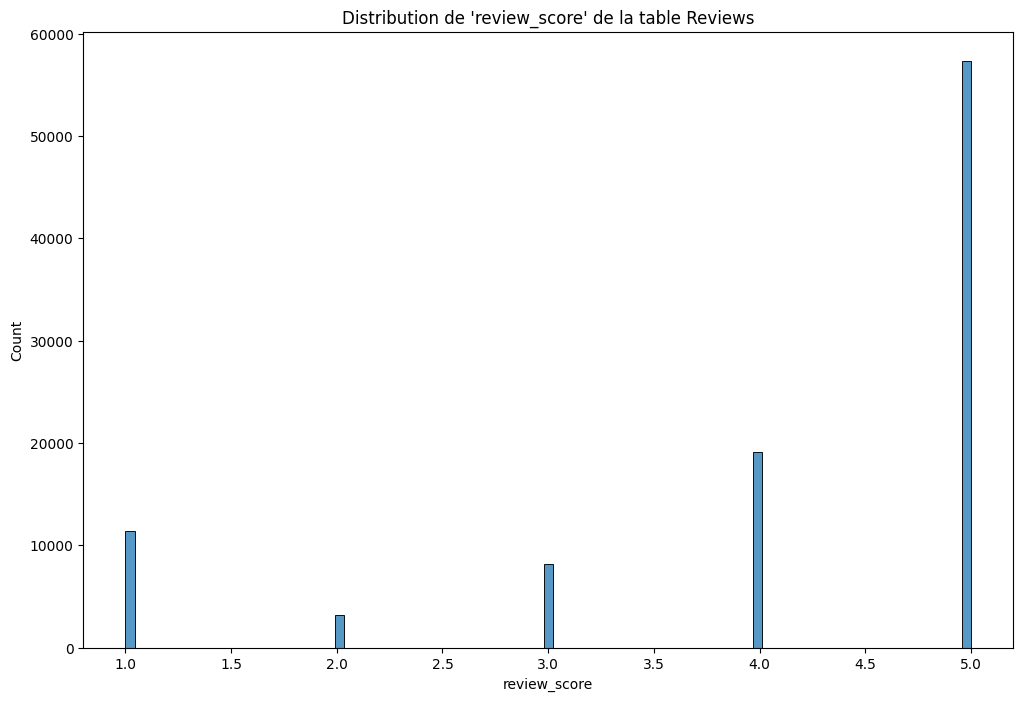

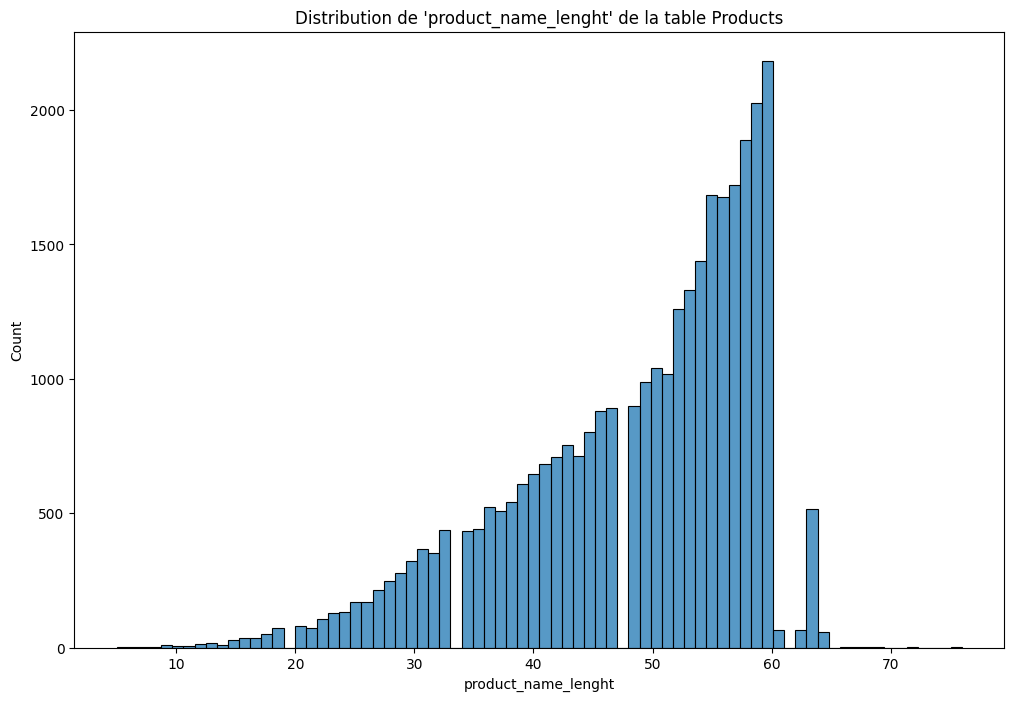

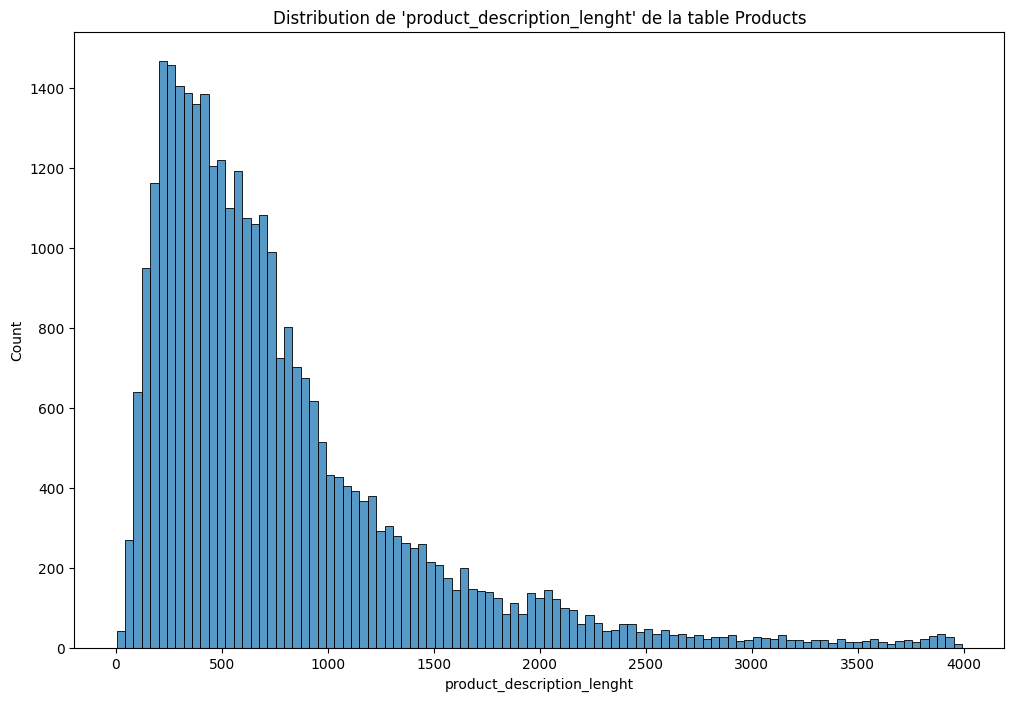

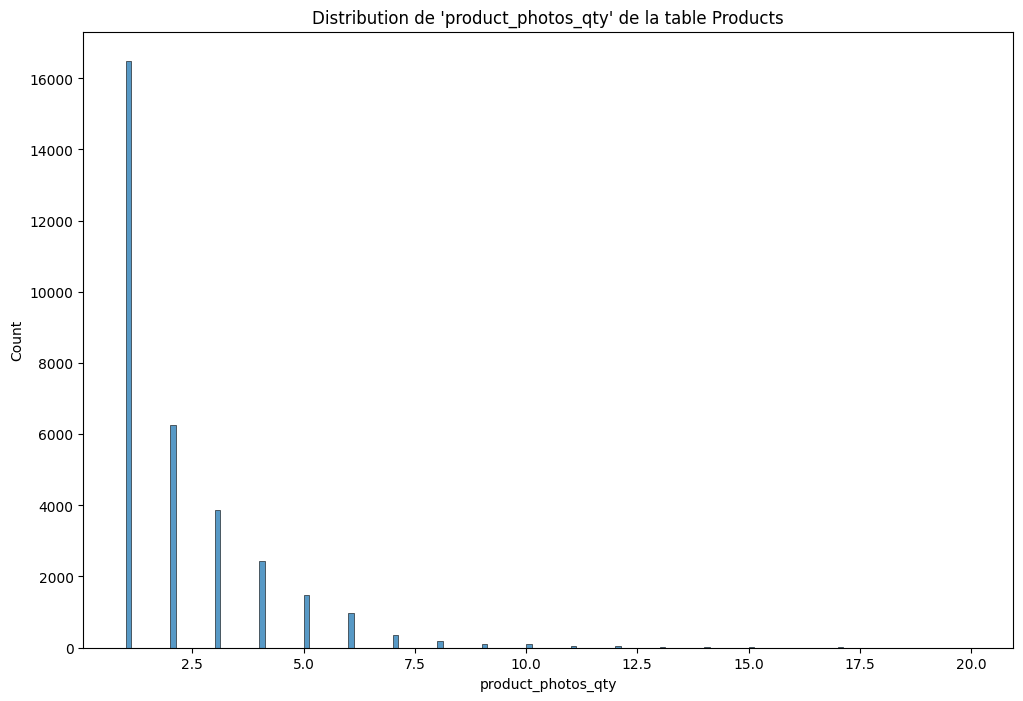

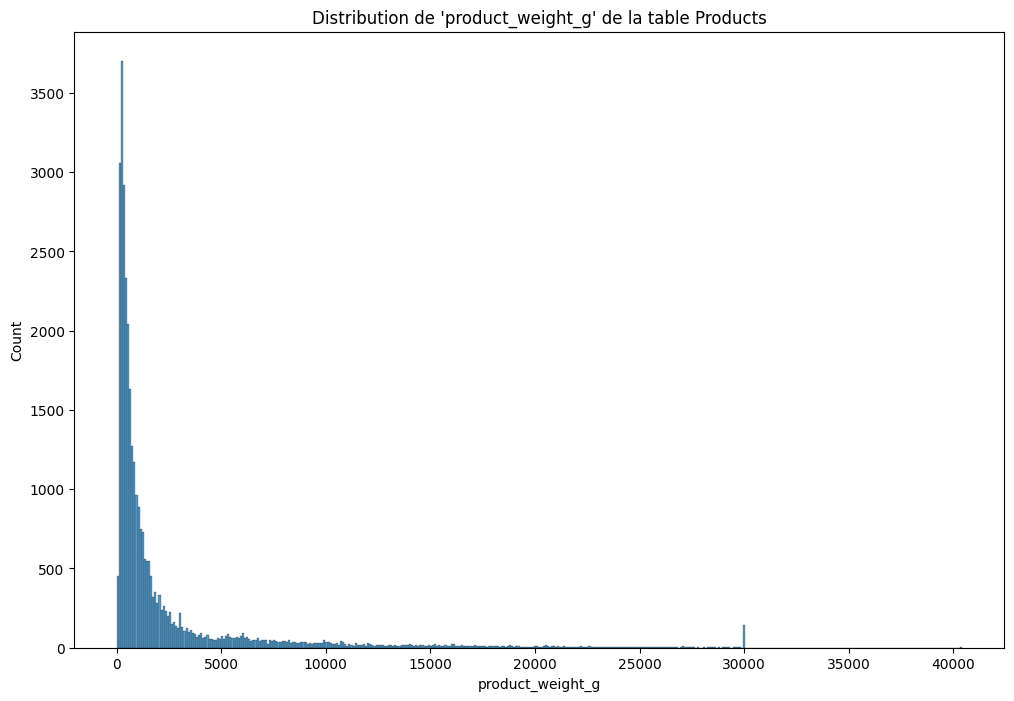

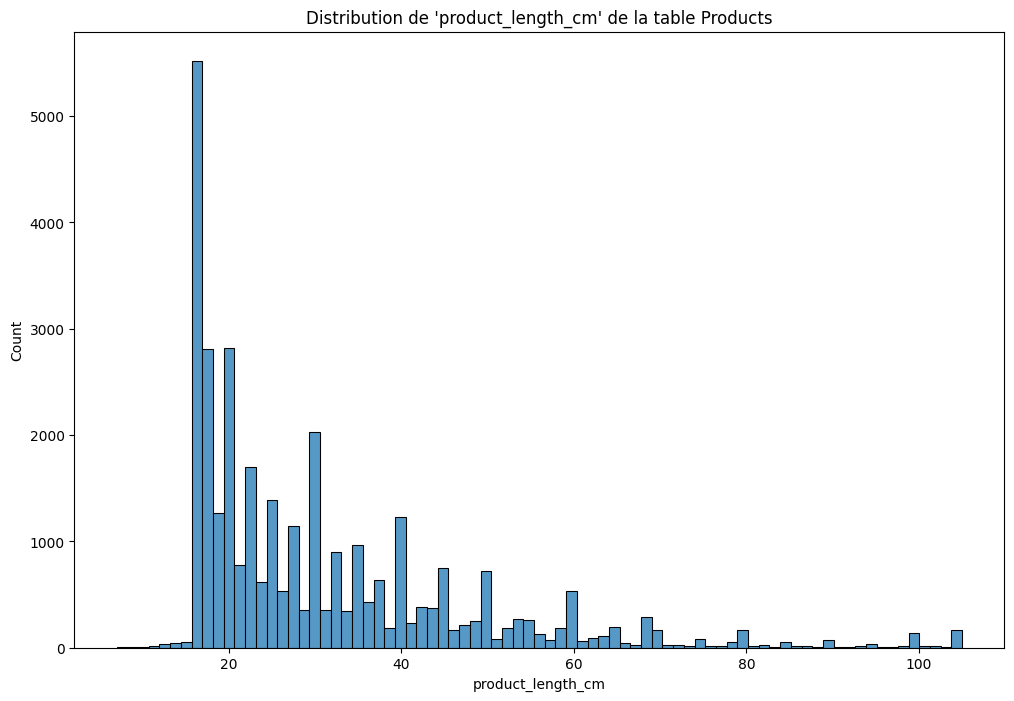

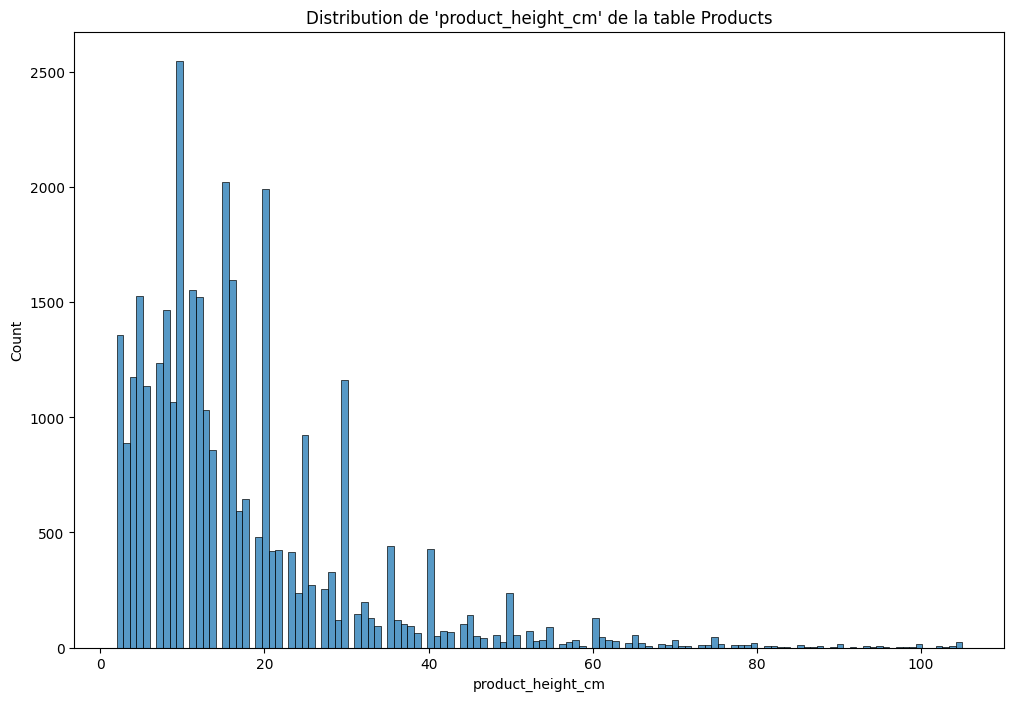

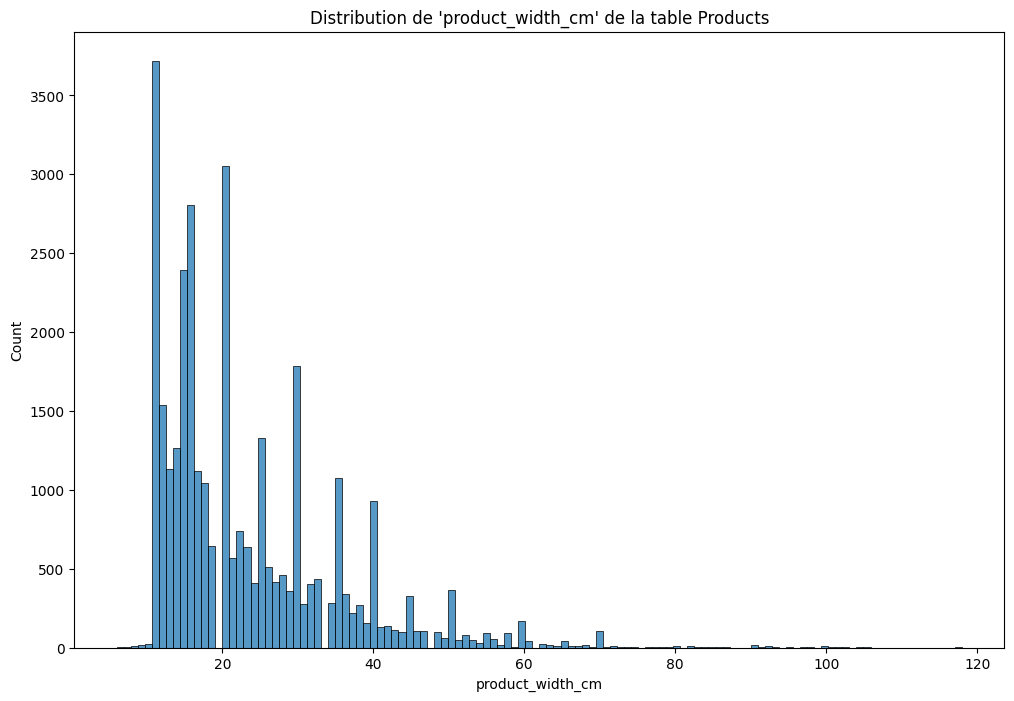

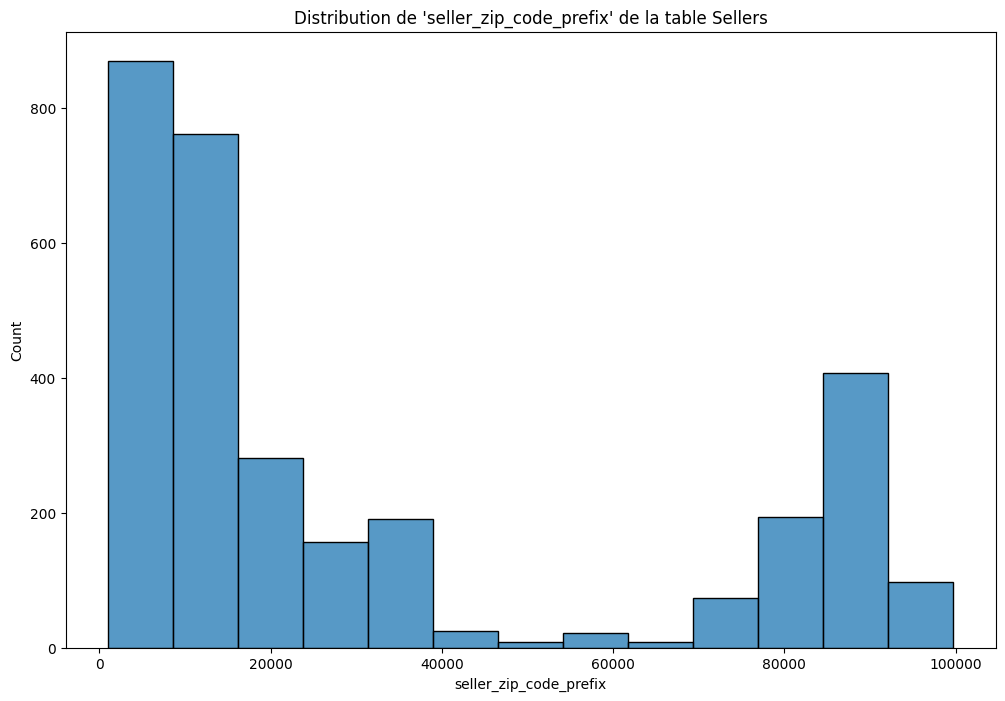

In [17]:
# Boucle pour afficher par graphique la distribution des colonnes numériques de chaque DataFrame
for i, df in enumerate(list_df):
    for col in df.select_dtypes(include='number'):
        plt.figure(figsize=(12, 8))
        sns.histplot(df[col])
        plt.title(f"Distribution de '{col}' de la table {list_noms[i]}")
        plt.show()

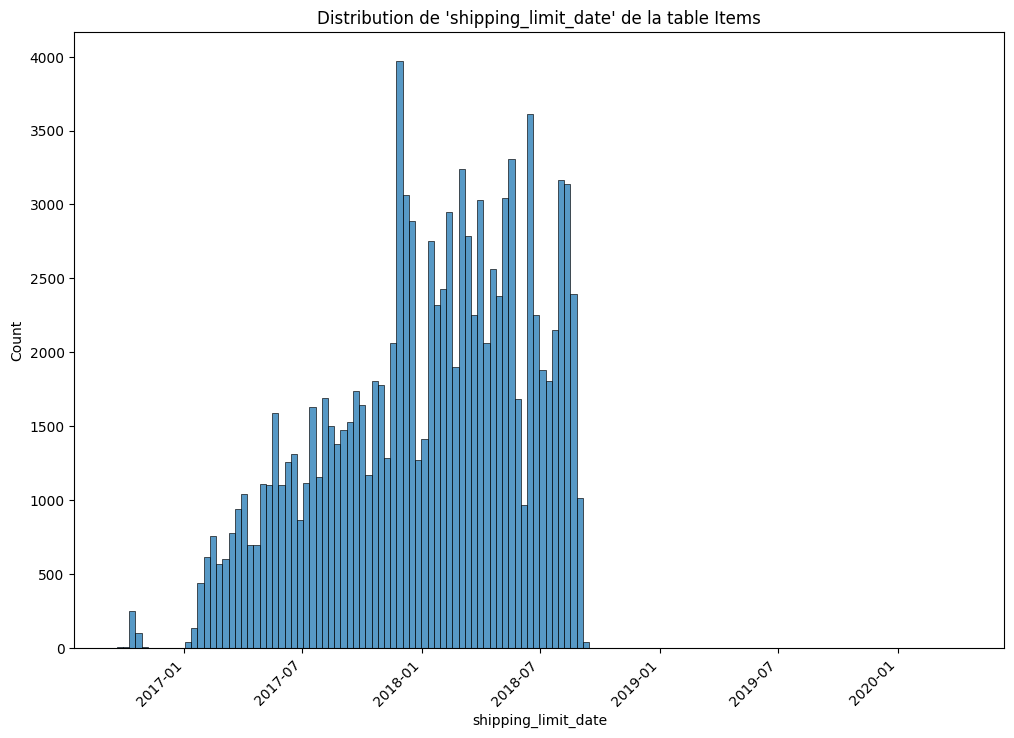

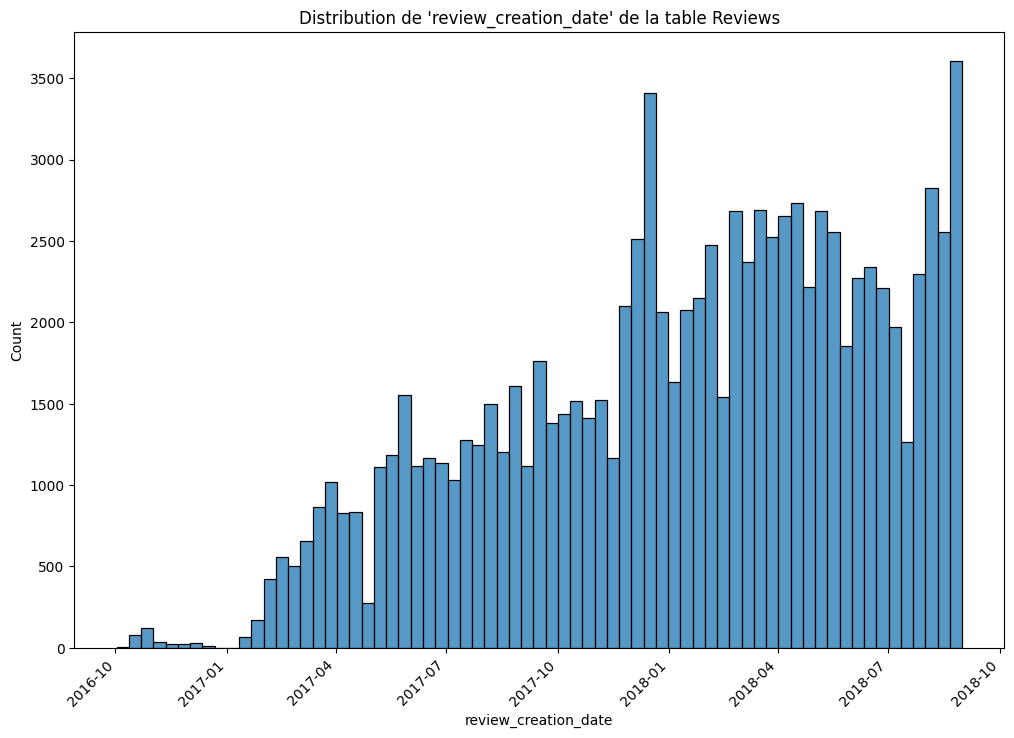

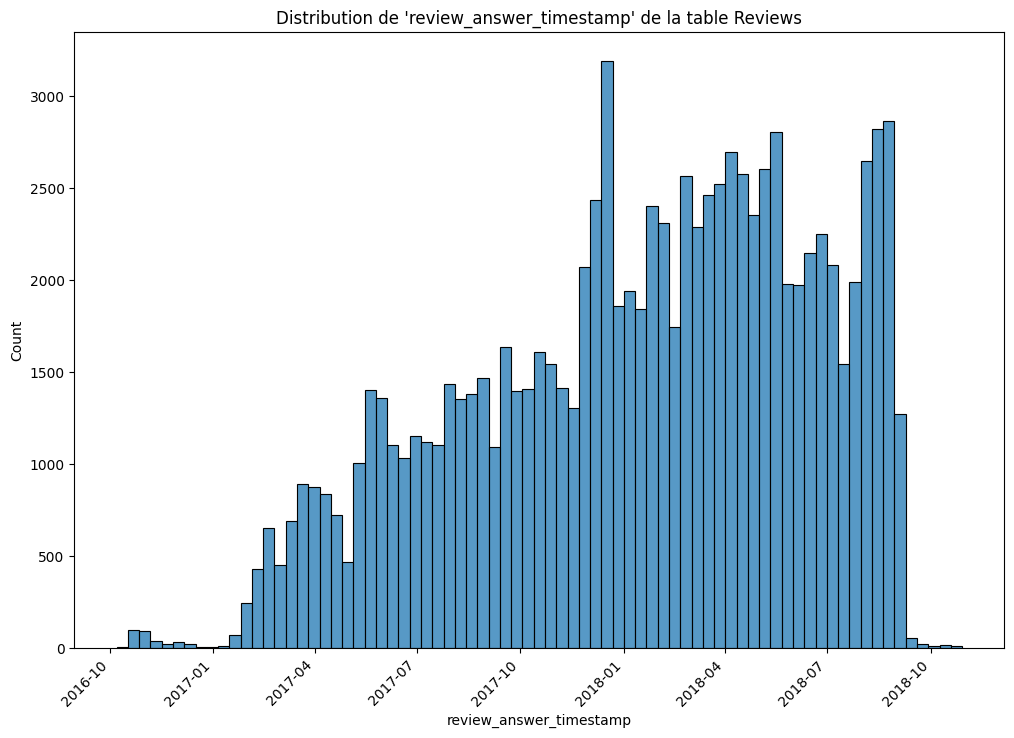

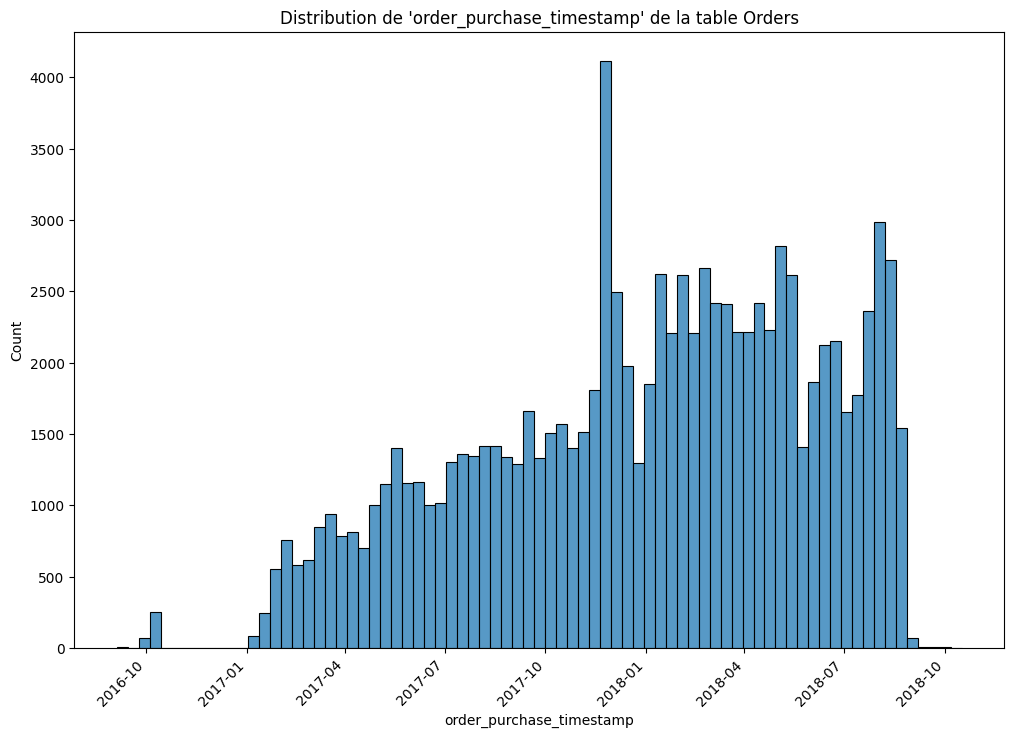

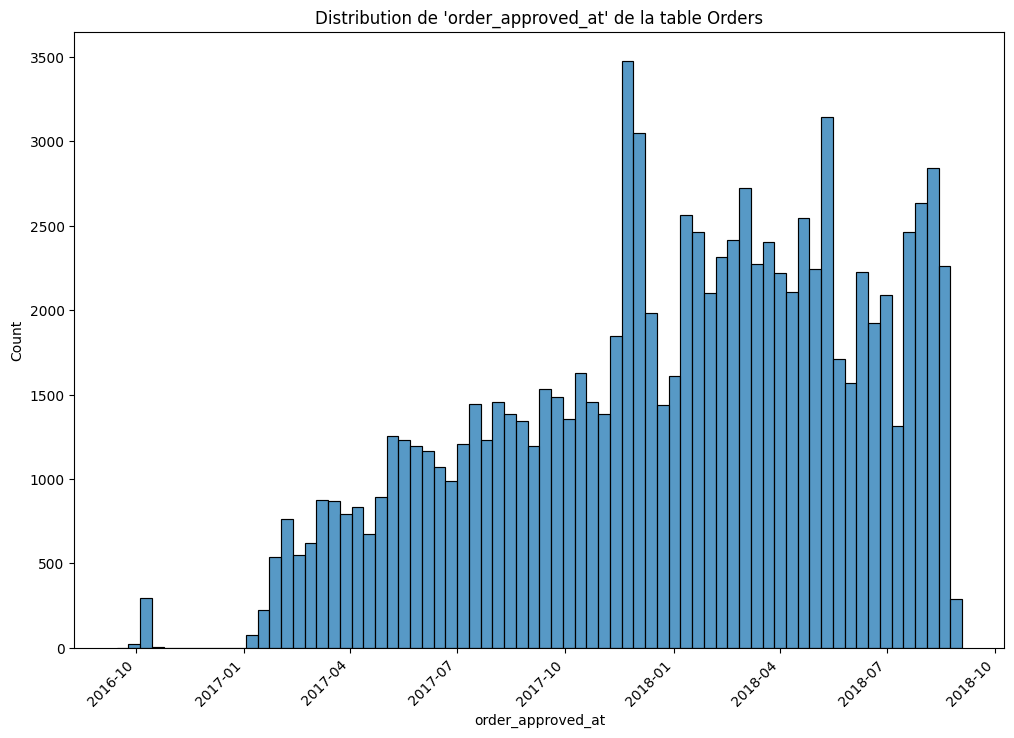

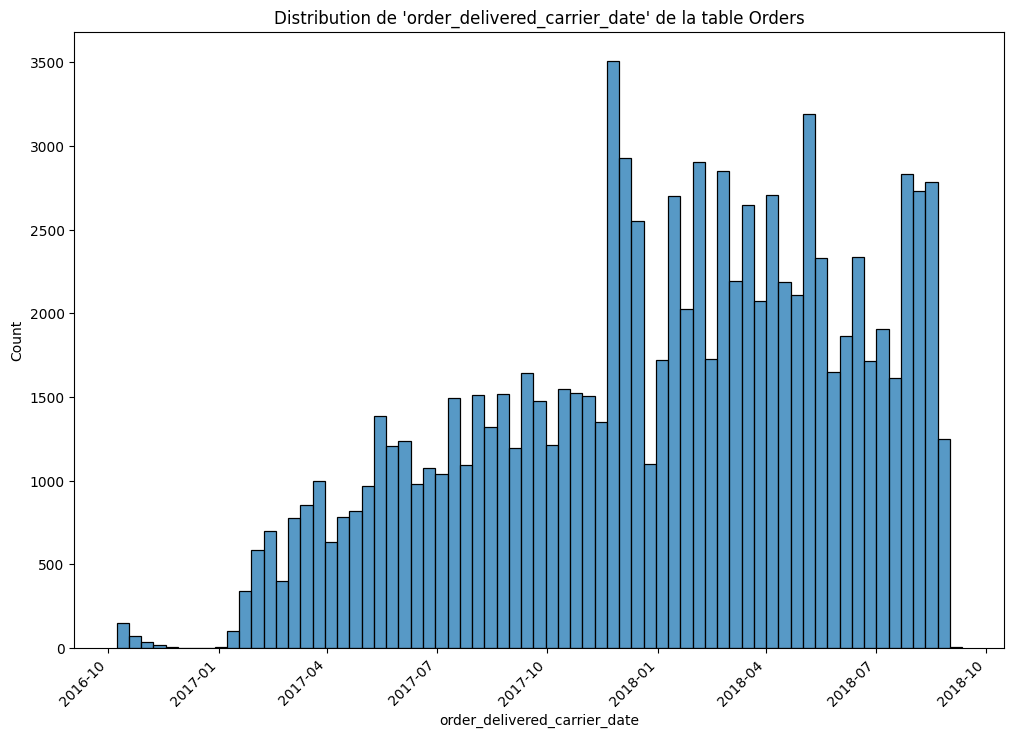

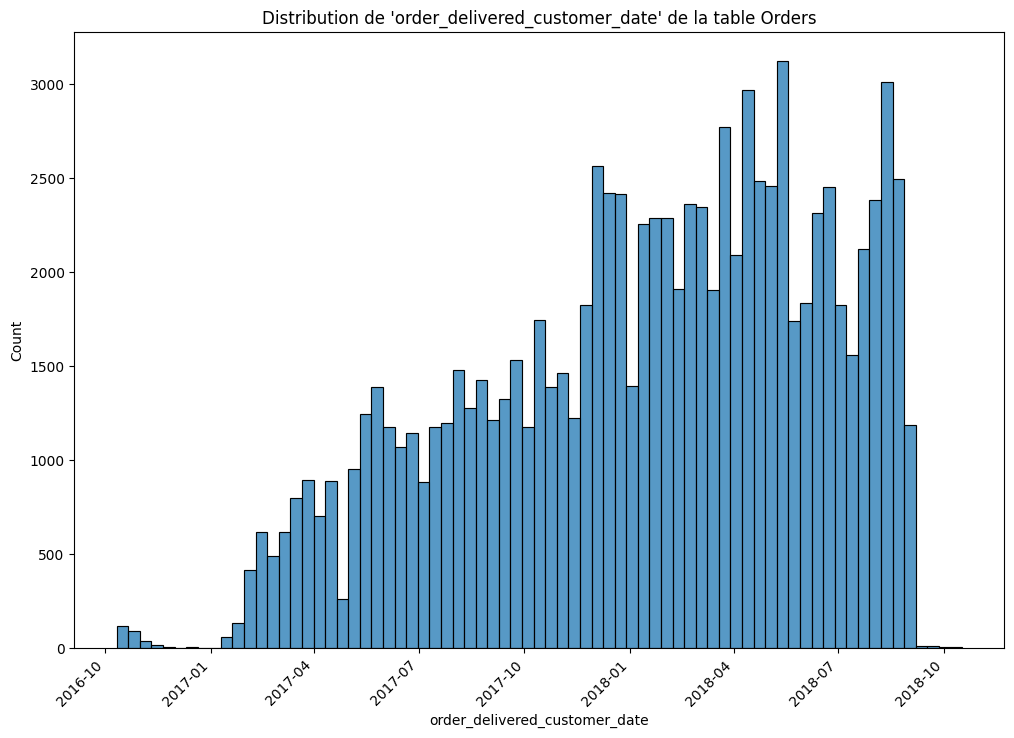

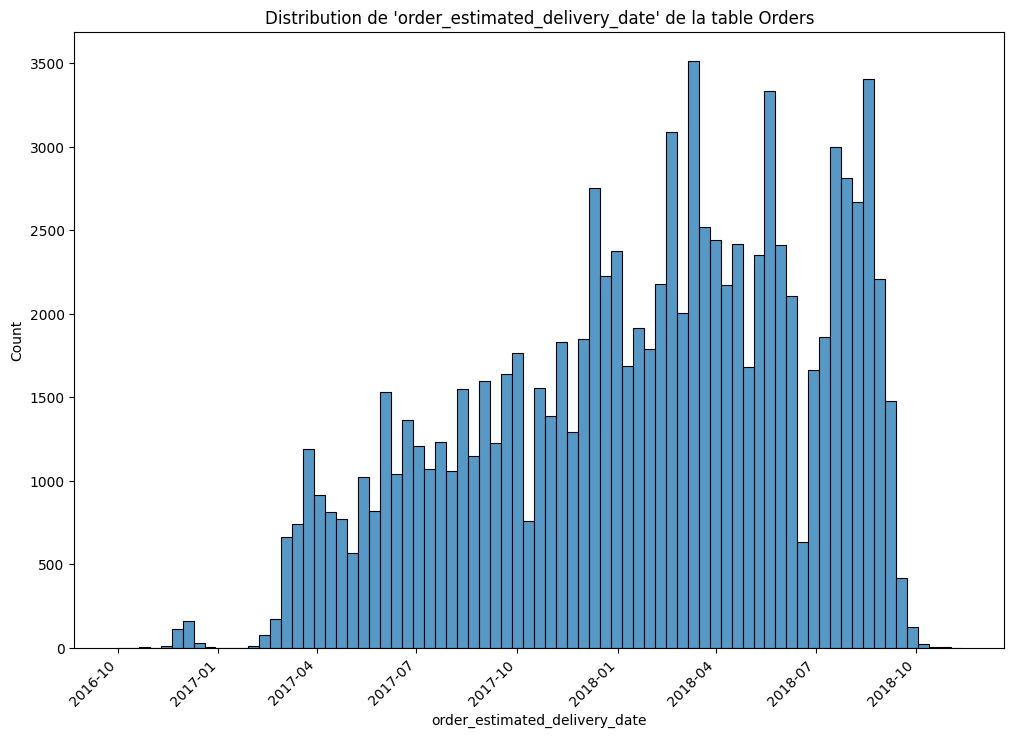

In [18]:
# Boucle pour afficher par graphique la distribution des colonnes de Dates de chaque DataFrame
for i, df in enumerate(list_df):
    for col in df.select_dtypes(include="datetime"):
        plt.figure(figsize=(12, 8))
        sns.histplot(df[col])
        plt.title(f"Distribution de '{col}' de la table {list_noms[i]}")
        plt.xticks(rotation=45, ha="right")
        plt.show()

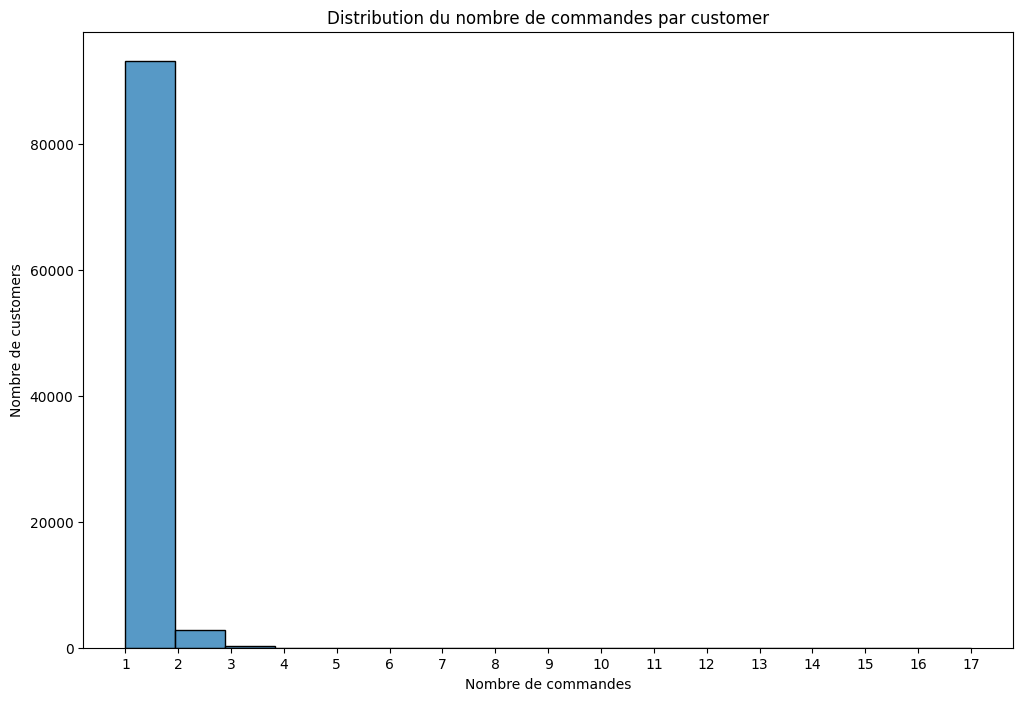

In [19]:
# Calcul du nombre de commandes par customer
group_customers = customers_data.groupby(by="customer_unique_id",
                                         as_index=False).count()

# Affichage du graphique de distribution du nombre de commandes par clients
plt.figure(figsize=(12, 8))
sns.histplot(group_customers["customer_id"], bins=17)
plt.title("Distribution du nombre de commandes par customer")
plt.xlabel("Nombre de commandes")
plt.ylabel("Nombre de customers")
plt.xticks(range(1, group_customers["customer_id"].max() + 1))
plt.show()

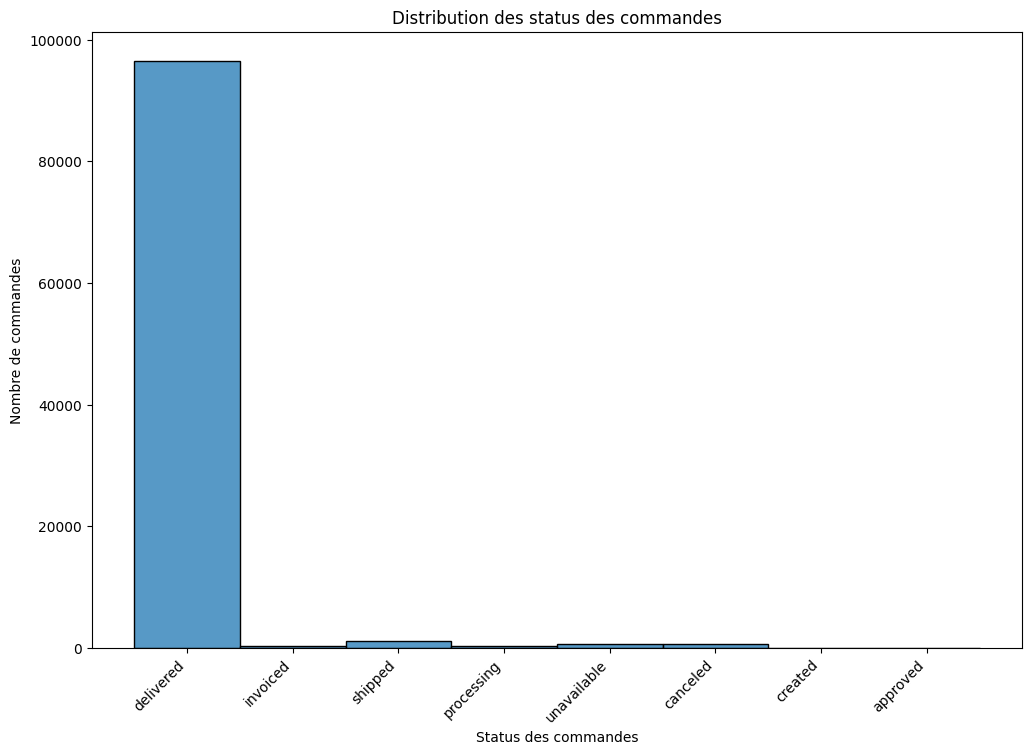

In [20]:
# Affichage du graphique de distribution du nombre de commandes par status
plt.figure(figsize=(12, 8))
sns.histplot(orders_data["order_status"])
plt.title("Distribution des status des commandes")
plt.xlabel("Status des commandes")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45, ha="right")
plt.show()

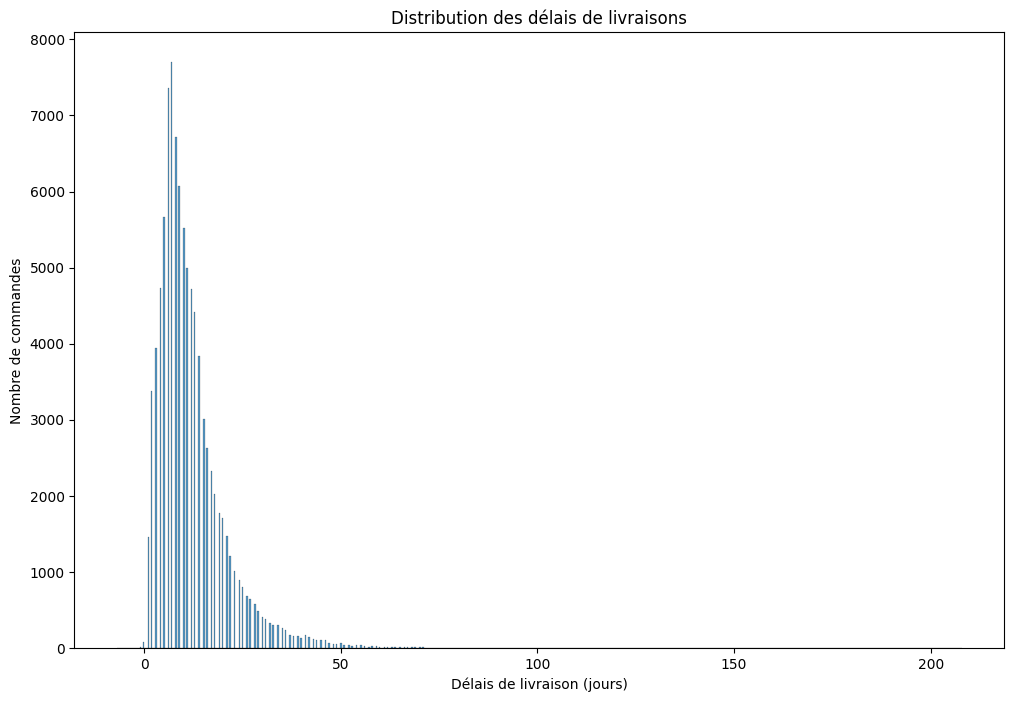

In [21]:
# Calcul du délai de livraison
orders_data["delivery_delai"] = (orders_data["order_delivered_customer_date"] - orders_data["order_approved_at"])
orders_data["delivery_delai"] = orders_data["delivery_delai"].apply(lambda x : x.days)

# Affichage de la distribution des délais de livraison
plt.figure(figsize=(12, 8))

sns.histplot(orders_data["delivery_delai"])
plt.title("Distribution des délais de livraisons")
plt.xlabel("Délais de livraison (jours)")
plt.ylabel("Nombre de commandes")
plt.show()

## Graphiques temporels

In [22]:
# Réupération de la date de la dernière commande
last_purchase = orders_data["order_purchase_timestamp"].max().date()
last_purchase

datetime.date(2018, 10, 17)

In [23]:
# Récupération de la date de la première commande
first_purchase = orders_data["order_purchase_timestamp"].min().date()
first_purchase

datetime.date(2016, 9, 4)

In [24]:
#Calcul du nombre de jours entre la première et la dernière commande
delta_first_to_last_purchase = last_purchase - first_purchase
delta_first_to_last_purchase

datetime.timedelta(days=773)

In [25]:
# Calcul du nombre d'années
year_delta = int(round(delta_first_to_last_purchase.days / 365, 0))
year_delta

2

In [26]:
# Regroupement par date d'achat et comptage du nombre de commandes
group_orders_purchase_date = orders_data.groupby(by="order_purchase_timestamp").count()
group_orders_purchase_date.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delai
order_purchase_timestamp,,,,,,,,
2016-09-04,1,1,1,1,1,0,1,0
2016-09-05,1,1,1,1,0,0,1,0
2016-09-13,1,1,1,1,0,0,1,0
2016-09-15,1,1,1,1,1,1,1,1
2016-10-02,1,1,1,1,0,0,1,0


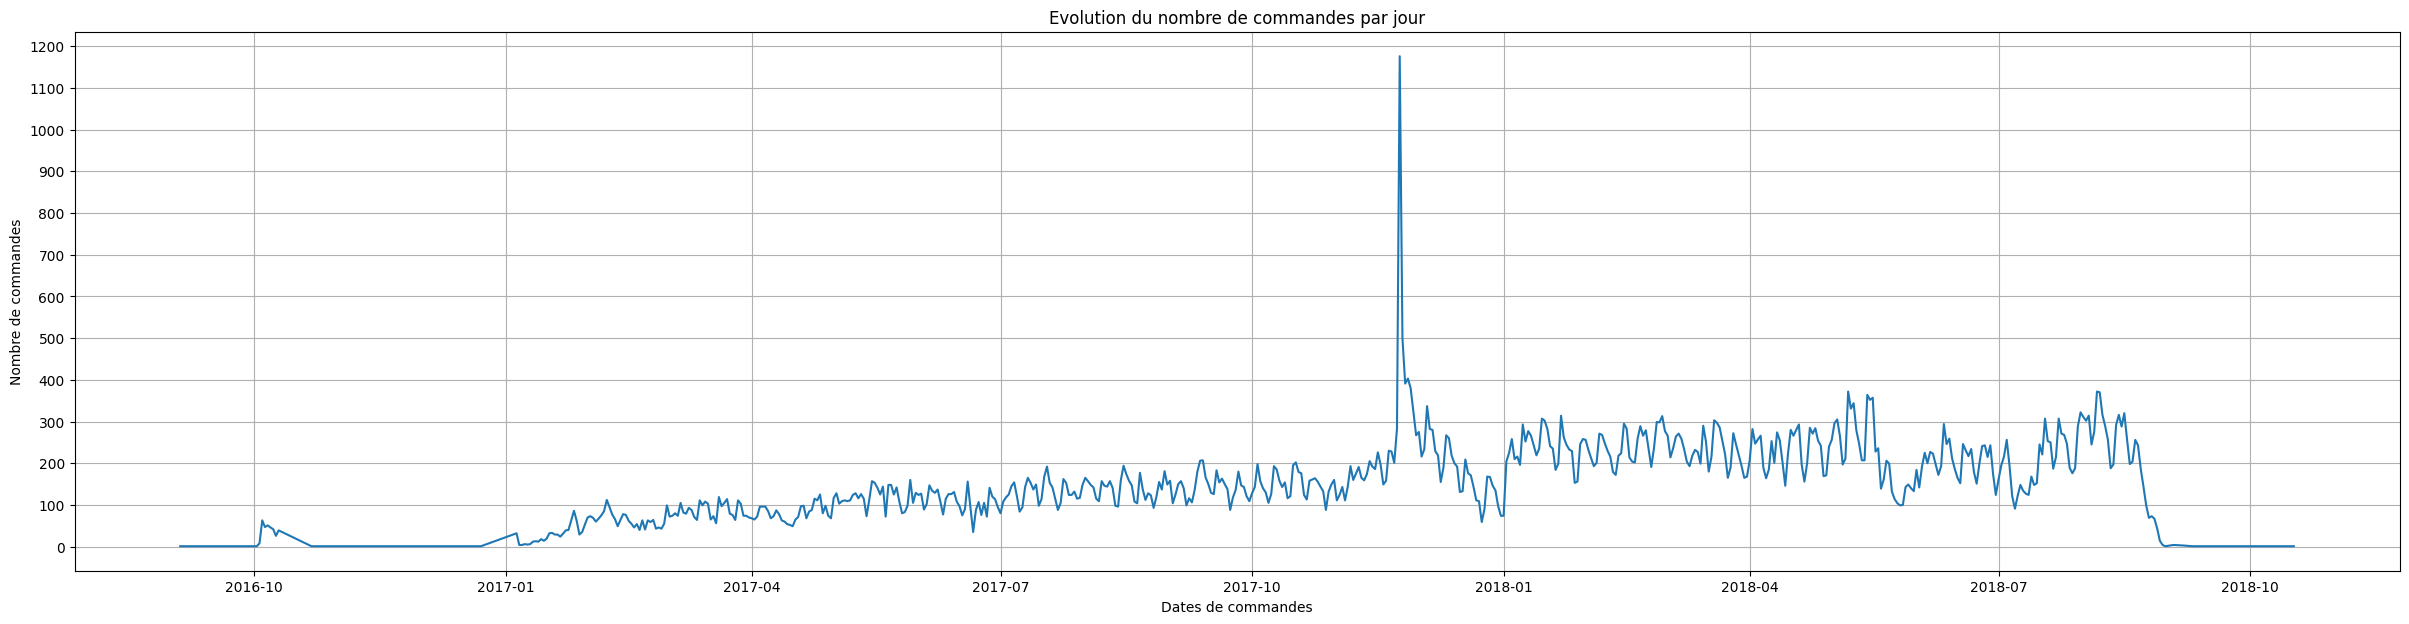

In [107]:
# Affichage du graphique du nombre de commandes par jours
plt.figure(figsize=(30, 7))

plt.plot(group_orders_purchase_date["order_id"])

plt.title("Evolution du nombre de commandes par jour")

plt.xlabel("Dates de commandes")
plt.ylabel("Nombre de commandes")
plt.yticks(range(0, 1300, 100))

plt.grid()
plt.show()

In [28]:
# Black Friday
group_orders_purchase_date[group_orders_purchase_date["order_id"]==1176]

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delai
order_purchase_timestamp,,,,,,,,
2017-11-24,1176,1176,1176,1176,1159,1147,1176,1147


In [29]:
orders_data.loc[orders_data["order_purchase_timestamp"]=="2017-11-24", "customer_id"].nunique()

1176

In [30]:
# Fusion des commandes et des paiements
orders_payment = orders_data.merge(
    payments_data[["order_id", "payment_value"]].groupby(by="order_id",
                                                         as_index=False).sum(),
    on="order_id")

# Regroupement des commandes par date d'achat et somme des paiements réalisés
group_orders_payments_date = orders_payment[[
    "order_purchase_timestamp", "payment_value"
]].groupby(by="order_purchase_timestamp").sum()
group_orders_payments_date.head()

,payment_value
order_purchase_timestamp,
2016-09-04,136.23
2016-09-05,75.06
2016-09-13,40.95
2016-10-02,109.34
2016-10-03,595.14


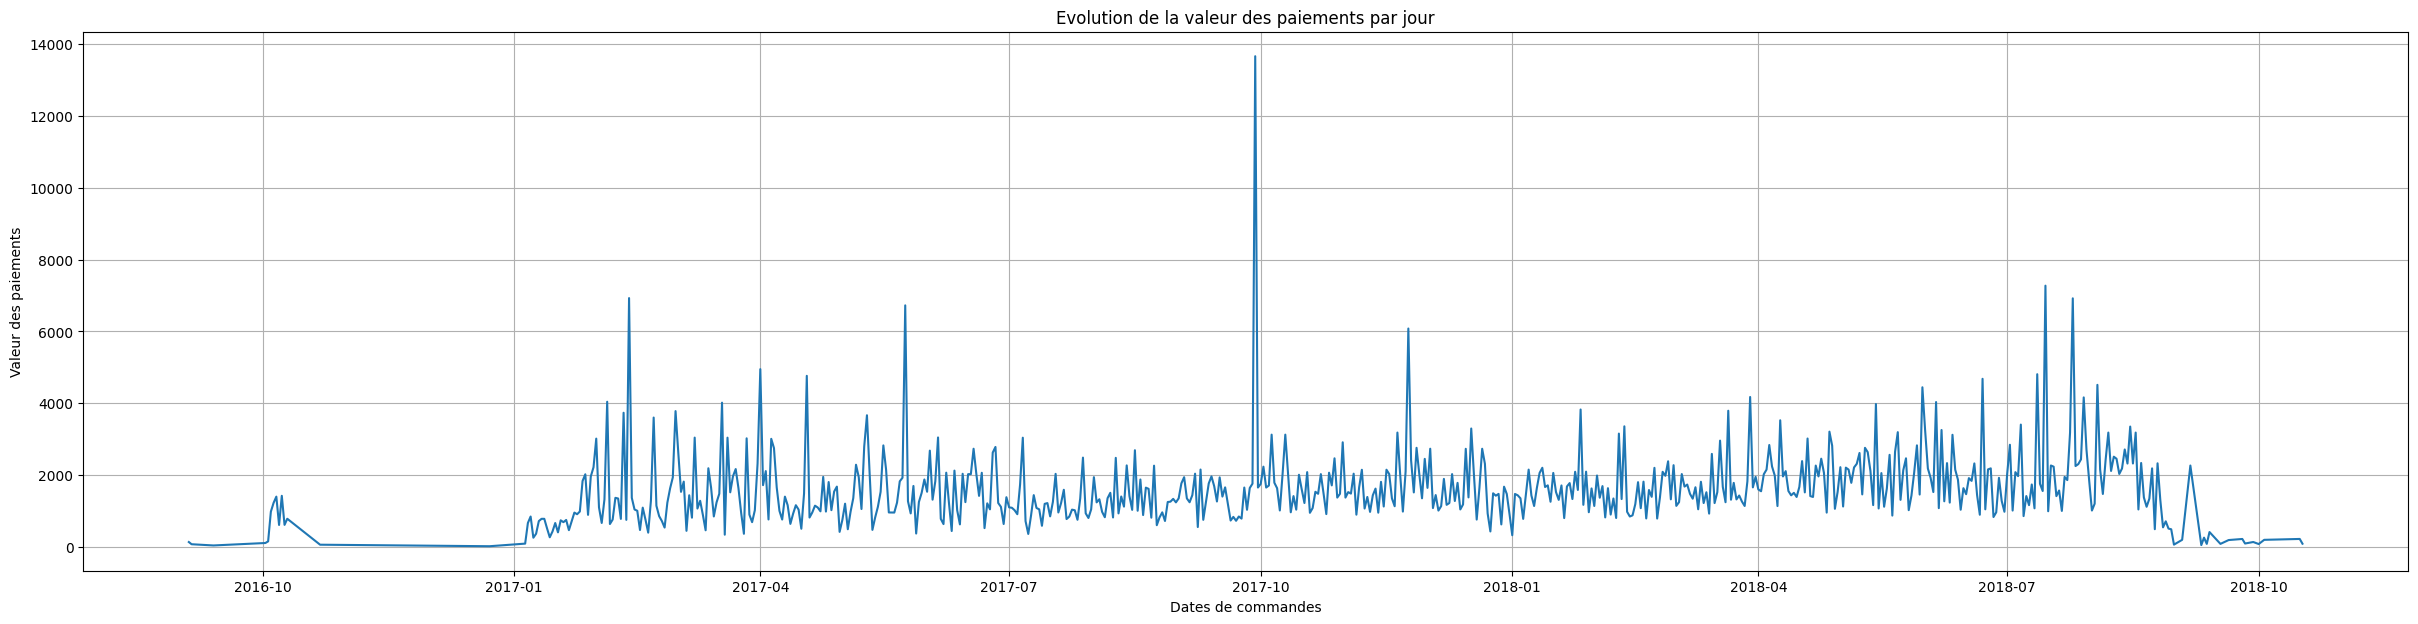

In [108]:
# Affihcage du graphique du total des paiements effectués par jour
plt.figure(figsize=(30, 7))
plt.plot(group_orders_payments_date)

plt.title("Evolution de la valeur des paiements par jour")

plt.xlabel("Dates de commandes")
plt.ylabel("Valeur des paiements")

plt.grid()
plt.show()

In [32]:
# Regroupement par date d'achat et récupération du plus grand paiement
group_orders_payments_date = orders_payment[[
    "order_purchase_timestamp", "payment_value"
]].groupby(by="order_purchase_timestamp").max()
group_orders_payments_date.head()

,payment_value
order_purchase_timestamp,
2016-09-04,136.23
2016-09-05,75.06
2016-09-13,40.95
2016-10-02,109.34
2016-10-03,154.57


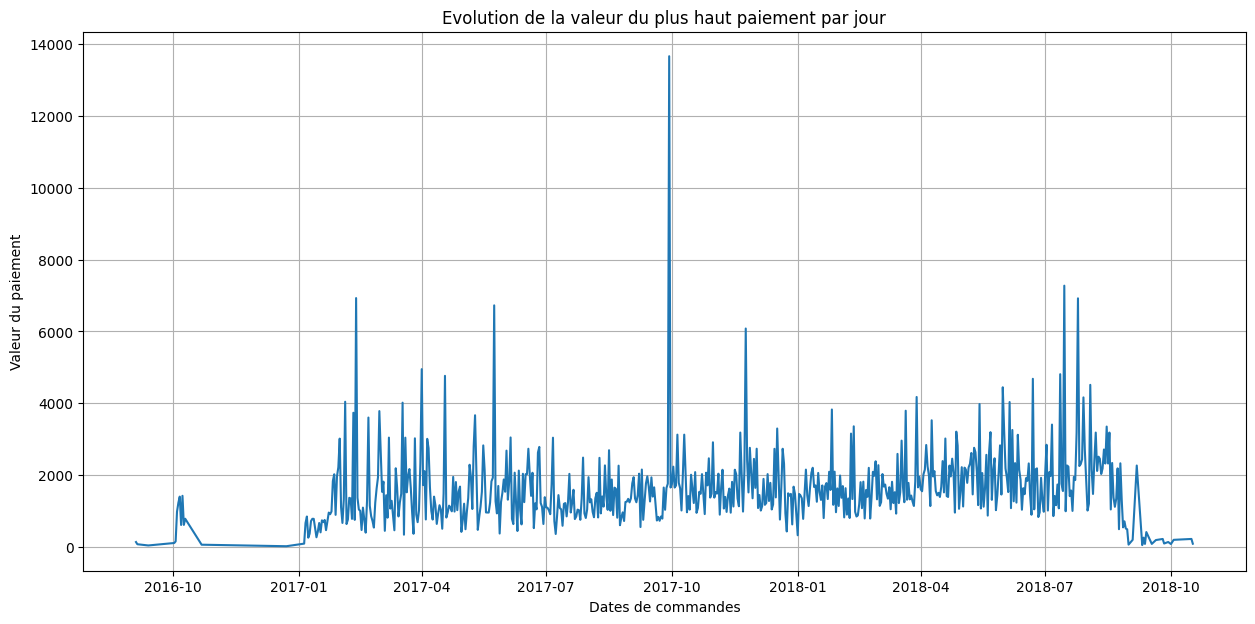

In [33]:
# Affichage du graphique du plus grand paiement par date
plt.figure(figsize=(15, 7))
plt.plot(group_orders_payments_date)

plt.title("Evolution de la valeur du plus haut paiement par jour")

plt.xlabel("Dates de commandes")
plt.ylabel("Valeur du paiement")

plt.grid()
plt.show()

## Corrélation des données

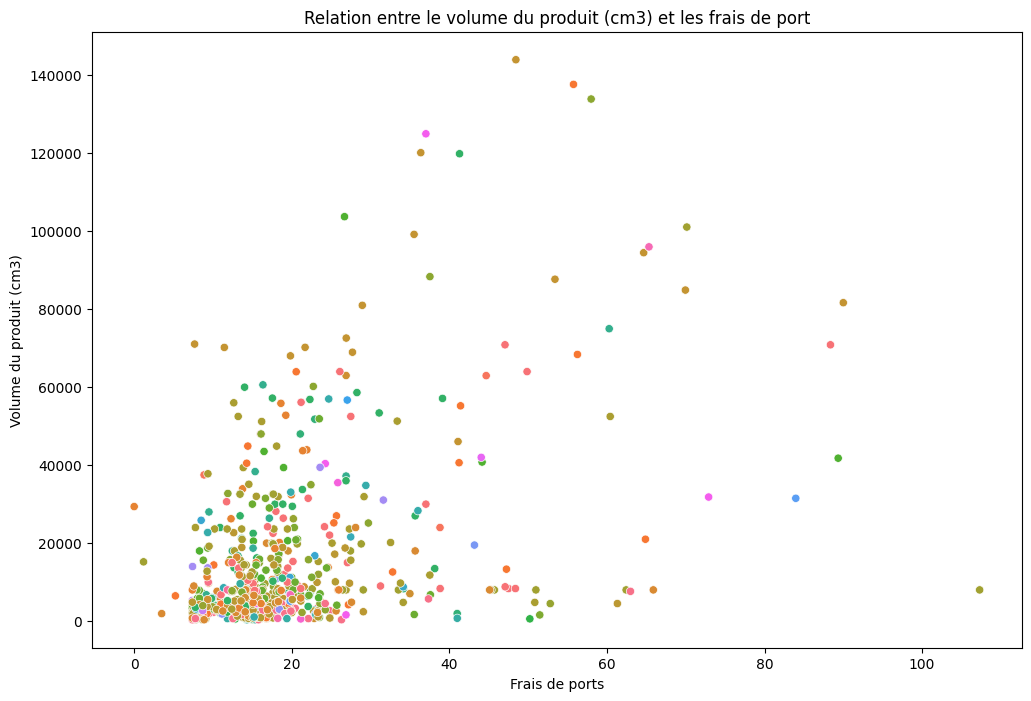

In [34]:
#  Fusion des DataFrame d'items et de produits
products_data = products_data.merge(translation_data,
                                    on="product_category_name")
items_graphs = items_data.merge(products_data, on="product_id", how="left")
# Calcul du volume de chaque produits
items_graphs[
    "volume_product"] = items_graphs["product_height_cm"] * items_graphs[
        "product_width_cm"] * items_graphs["product_length_cm"]

# Récupération de 700 individus pour affihcer les graphiques
sample_graphs = items_graphs.sample(700, random_state=42)

# Affichage du graphique de relation entre le volume du produit et les frais de port
plt.figure(figsize=(12, 8))

sns.scatterplot(data=sample_graphs,
                x="freight_value",
                y="volume_product",
                hue=sample_graphs["product_category_name_english"],
                legend=False)

plt.title("Relation entre le volume du produit (cm3) et les frais de port")
plt.xlabel("Frais de ports")
plt.ylabel("Volume du produit (cm3)")
plt.show()

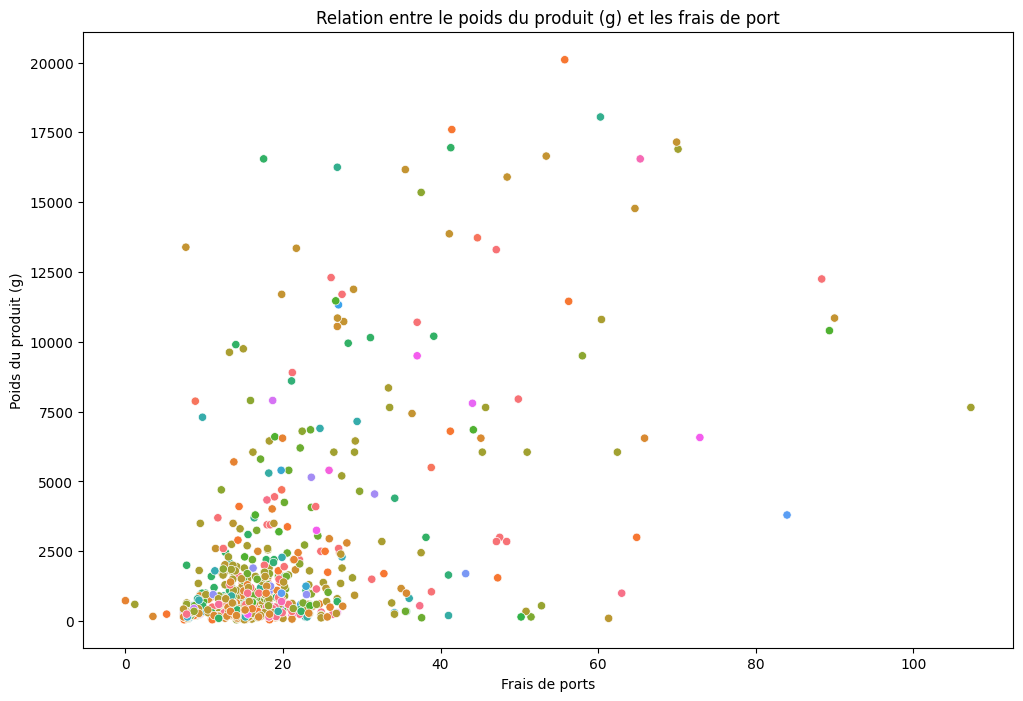

In [35]:
# Affichage du graphique de relation entre le poids et les frais de port
plt.figure(figsize=(12, 8))

sns.scatterplot(data=sample_graphs,
                x="freight_value",
                y="product_weight_g",
                hue=sample_graphs["product_category_name_english"],
                legend=False)

plt.title("Relation entre le poids du produit (g) et les frais de port")
plt.xlabel("Frais de ports")
plt.ylabel("Poids du produit (g)")
plt.show()

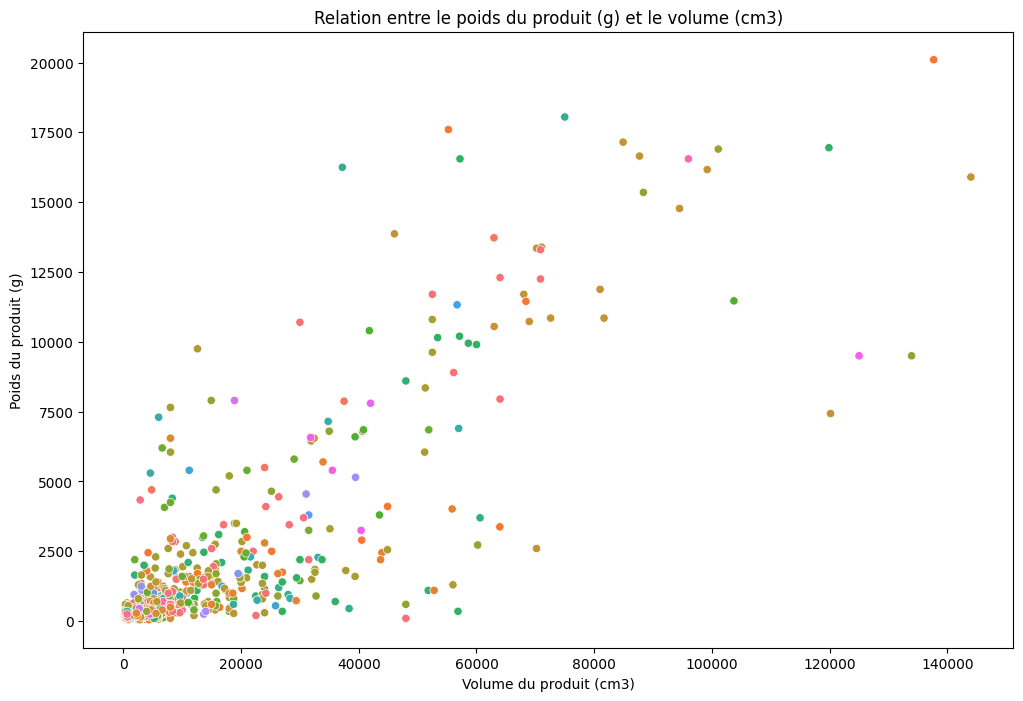

In [36]:
# Affichage du graphique de relation entre le poids et le volume des produits
plt.figure(figsize=(12, 8))

sns.scatterplot(data=sample_graphs,
                x="volume_product",
                y="product_weight_g",
                hue=sample_graphs["product_category_name_english"],
                legend=False)

plt.title("Relation entre le poids du produit (g) et le volume (cm3)")
plt.xlabel("Volume du produit (cm3)")
plt.ylabel("Poids du produit (g)")
plt.show()

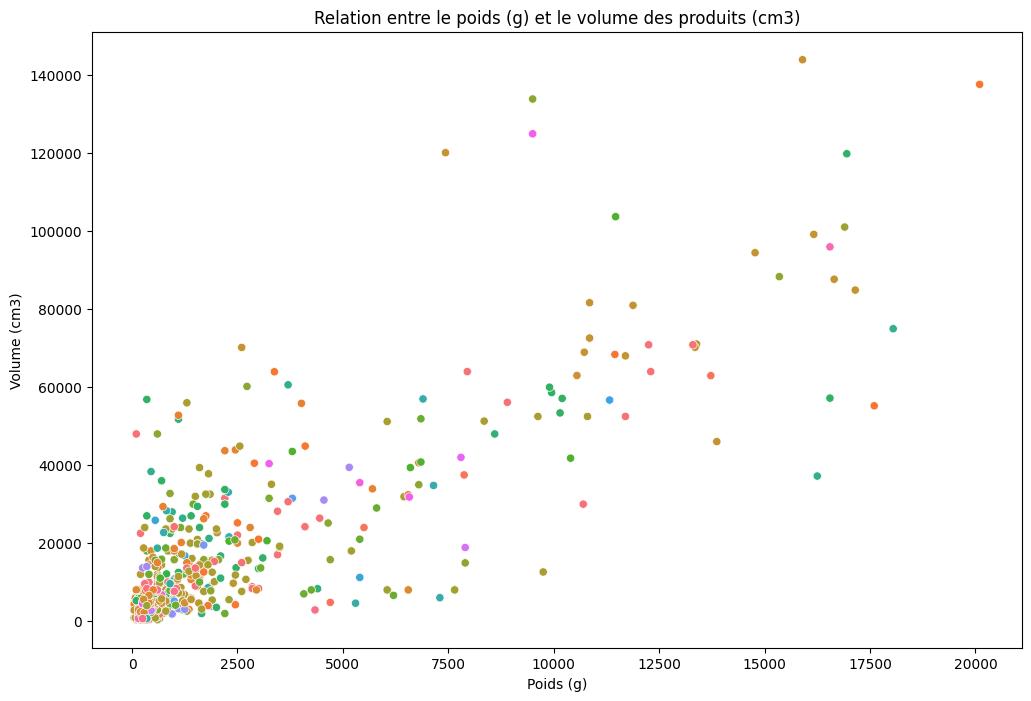

In [37]:
# Affichage du graphique avec inversion des abcisses et ordonnées
plt.figure(figsize=(12, 8))

sns.scatterplot(data=sample_graphs,
                x="product_weight_g",
                y="volume_product",
                hue=sample_graphs["product_category_name_english"],
                legend=False)
plt.title("Relation entre le poids (g) et le volume des produits (cm3)")
plt.xlabel("Poids (g)")
plt.ylabel("Volume (cm3)")
plt.show()

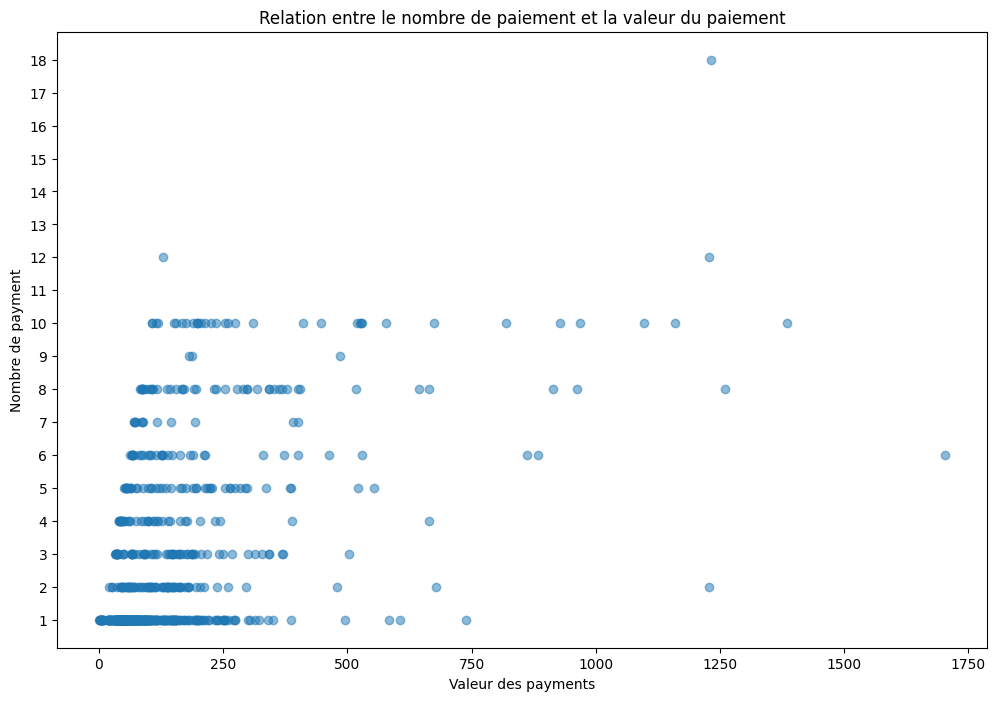

In [38]:
# Récupération de 700 inidvidus du DataFrame de paiements
payments_graphs = payments_data.sample(700, random_state=42)

# Affichage du graphique de relation entre le nombre et la valeur des paiements
plt.figure(figsize=(12, 8))

plt.scatter(data=payments_graphs, x="payment_value", y="payment_installments", alpha=0.5)
plt.title("Relation entre le nombre de paiement et la valeur du paiement")
plt.xlabel("Valeur des payments")
plt.ylabel("Nombre de payment")
plt.yticks(range(1, payments_graphs["payment_installments"].max()+1))
plt.show()

# Mise en oeuvre du RFM
## Récupération des données

In [39]:
# création d'une liste avec les colonnes d'identifiants de commande et valeur du paiement
rfm_payments_col = ["order_id", "payment_value"]

# regroupement des paiements par commandes
rfm_payments_data = payments_data[rfm_payments_col].groupby("order_id").sum()
rfm_payments_data.head()

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [40]:
# Fusion des paiements et des commandes (1 paiement par commande)
rfm_complete_orders_data = orders_data.merge(rfm_payments_data,
                                             how="inner",
                                             on="order_id")
rfm_complete_orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delai,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,8.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,14.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,3.0,28.62


In [41]:
# Fusion avec le DataFrame des clients pour avoir les ID uniques
rfm_complete_orders_data = rfm_complete_orders_data.merge(customers_data,
                                                          how="inner",
                                                          on="customer_id")
rfm_complete_orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delai,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,8.0,38.71,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,12.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,9.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,14.0,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,3.0,28.62,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [42]:
# Nombre de clients unique
rfm_complete_orders_data["customer_unique_id"].nunique()

96095

In [43]:
# Création de la liste des colonnes utiles pour calculer la segmentation RFM
cols_rfm = ["customer_unique_id", "order_purchase_timestamp", "payment_value"]

# Récupération des données utiles
rfm_data = rfm_complete_orders_data[cols_rfm]
rfm_data

,customer_unique_id,order_purchase_timestamp,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02,38.71
1,af07308b275d755c9edb36a90c618231,2018-07-24,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08,179.12
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13,28.62
...,...,...,...
99435,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09,85.08
99436,da62f9e57a76d978d02ab5362c509660,2018-02-06,195.00
99437,737520a9aad80b3fbbdad19b66b37b30,2017-08-27,271.01
99438,5097a5312c8b157bb7be58ae360ef43c,2018-01-08,441.16


## Création des colonnes RFM

In [44]:
# Groupement par client unique et récupération de la dernière date de commande pour chacun
df_recency = rfm_data.groupby(
    by="customer_unique_id", as_index=False)["order_purchase_timestamp"].max()
df_recency.columns = ["Customer_ID", "Last_Purchase_Date"]

# Récupération de la dernière date de commande 
recent_date = df_recency["Last_Purchase_Date"].max()

# Calcul de la colonne Recency
df_recency["Recency"] = df_recency["Last_Purchase_Date"].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,Customer_ID,Last_Purchase_Date,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,163
2,0000f46a3911fa3c0805444483337064,2017-03-10,586
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,370
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,337


In [45]:
df_recency.nunique()

Customer_ID           96095
Last_Purchase_Date      631
Recency                 631
dtype: int64

In [46]:
# Calcul de la colonne Frequency
df_frequency = rfm_data.groupby(
    by="customer_unique_id",
    as_index=False)["order_purchase_timestamp"].count()
df_frequency.columns = ["Customer_ID", "Frequency"]
df_frequency.head()

,Customer_ID,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [47]:
df_frequency.nunique()

Customer_ID    96095
Frequency          9
dtype: int64

In [48]:
# Calcul de la colonne Monetary
df_monetary = rfm_data.groupby(by="customer_unique_id",
                               as_index=False)["payment_value"].sum()
df_monetary.columns = ["Customer_ID", "Monetary"]
df_monetary.head()

,Customer_ID,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [49]:
df_monetary.nunique()

Customer_ID    96095
Monetary       28836
dtype: int64

In [50]:
# Fusion de tous les DataFrame avec les bonnes colonnes
rf_df = df_recency.merge(df_frequency, on="Customer_ID")
rfm_df = rf_df.merge(df_monetary,
                     on="Customer_ID").drop(columns="Last_Purchase_Date")
rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,586,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,370,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,337,1,196.89


In [51]:
# Suppression des utilisateurs qui n'ont pas fait de paiement
rfm_df = rfm_df[rfm_df["Monetary"]>0]

In [52]:
rfm_df["Customer_ID"].nunique()

96093

## Calcul du Score

In [53]:
# Calcul des Tertiles
rfm_df["R_Tertile"] = pd.qcut(rfm_df["Recency"], 3, labels=["3", "2", "1"])
rfm_df["F_Tertile"] = pd.qcut(rfm_df["Frequency"].rank(method="first"),
                               3,
                               labels=["1", "2", "3"])
rfm_df["M_Tertile"] = pd.qcut(rfm_df["Monetary"], 3, labels=["1", "2", "3"])

In [54]:
# Concaténation des Tertiles
rfm_df["RFM_Score"] = rfm_df["R_Tertile"].astype(
    str) + rfm_df["F_Tertile"].astype(str) + rfm_df["M_Tertile"].astype(str)

In [55]:
# Affichage des différentes combinaisons
rfm_df["RFM_Score"].unique()

array(['312', '311', '112', '111', '213', '313', '212', '211', '113',
       '333', '233', '332', '132', '133', '231', '232', '331', '131',
       '222', '223', '122', '221', '322', '321', '323', '121', '123'],
      dtype=object)

In [56]:
# Création d'un dictionnaire avec les combinaisons et le segment correspondant
customer_segment_dict = {
    "111": "Perdus",
    "112": "A risque",
    "113": "A risque",
    "121": "Perdus",
    "122": "A risque",
    "123": "A risque",
    "131": "Loyalistes potentiels",
    "132": "Loyalistes potentiel",
    "133": "A réactiver",
    "211": "Perdus",
    "212": "A risque",
    "213": "A risque",
    "221": "Loyalistes potentiels",
    "222": "Loyalistes potentiels",
    "223": "A réactiver",
    "231": "Loyalistes potentiels",
    "232": "A réactiver",
    "233": "A réactiver",
    "311": "Loyalistes potentiels",
    "312": "Loyalistes potentiels",
    "313": "A réactiver",
    "321": "Loyaux",
    "322": "Loyaux",
    "323": "A réactiver",
    "331": "Loyaux",
    "332": "Loyaux",
    "333": "Champions"
}

# Création d'un DataFrame avec les scores et segments
customer_segment_df = pd.DataFrame(customer_segment_dict,
                                   index=[0]).T.reset_index()
customer_segment_df.columns = ["RFM_Score", "Customer_Segment"]
customer_segment_df

,RFM_Score,Customer_Segment
0,111,Perdus
1,112,A risque
2,113,A risque
3,121,Perdus
4,122,A risque
5,123,A risque
6,131,Loyalistes potentiels
7,132,Loyalistes potentiel
8,133,A réactiver
9,211,Perdus


In [57]:
# Fusion des segments avec le DataFrame rfm
rfm_df = rfm_df.merge(customer_segment_df, on="RFM_Score")
rfm_df

,Customer_ID,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,Customer_Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,3,1,2,312,Loyalistes potentiels
1,000949456b182f53c18b68d6babc79c1,177,1,82.05,3,1,2,312,Loyalistes potentiels
2,000e309254ab1fc5ba99dd469d36bdb4,114,1,78.42,3,1,2,312,Loyalistes potentiels
3,002311514717ca8b65b09a26cdf7b91a,112,1,124.32,3,1,2,312,Loyalistes potentiels
4,002471155ecd08d208d1376720e2a907,70,1,92.18,3,1,2,312,Loyalistes potentiels
...,...,...,...,...,...,...,...,...,...
96088,afbb296a1b427a13ad961689550a56fa,497,1,229.92,1,2,3,123,A risque
96089,afc3b9718292d80bda6179ab4ac09f0f,413,1,169.51,1,2,3,123,A risque
96090,afc8ac975588e4d0bb6e0a7dda3f2dcb,440,1,805.95,1,2,3,123,A risque
96091,afcde4ad41477fa81f6f88dae6734ef6,401,1,184.29,1,2,3,123,A risque


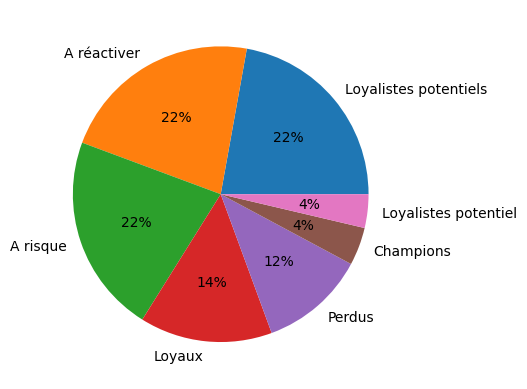

In [58]:
# Affichage du graphique camembert avec le pourcentage de représentation pour chaque segment
plt.pie(rfm_df.Customer_Segment.value_counts(),
        labels=rfm_df.Customer_Segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

# Feature Engineering
## Fusion des données
### Calcul de la dernière note donnée

In [59]:
# Fusion des données de commandes et de notes
orders_reviews_data = orders_data.merge(reviews_data, on="order_id")

# Fusion avec les id uniques de chaque client
complete_customers_data = customers_data.merge(orders_reviews_data, on="customer_id", how="left")

print(complete_customers_data.shape, "\n")
complete_customers_data.head()

(99992, 19) 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delai,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,9.0,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26,2017-05-30
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,17.0,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30,2018-02-10
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,25.0,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15,2018-06-15
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,15.0,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29,2018-04-02
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,11.0,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17


In [60]:
# Tri par date de notes
complete_customers_data.sort_values("review_creation_date", inplace=True)

# Récupération de la dernière note donnée par utilisateur
complete_customers_data.drop_duplicates(subset=["customer_unique_id"], keep="last", inplace=True)

print(complete_customers_data.shape, "\n")
complete_customers_data.head()

(96096, 19) 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delai,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
85329,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13,2016-10-07,NaT,NaT,2016-09-30,NaN,69ac6a27fde9855ebeaaecac0f78058b,1.0,NaN,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...,2016-10-02,2016-10-26
21252,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04,55.0,6916ca4502d6d3bfd39818759d55d536,1.0,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06,2016-10-07
53050,b6f6cbfc126f1ae6723fe2f9b3751208,281096eb031de8c318bba51915fdd16a,62680,paracuru,CE,e5215415bb6f76fe3b7cb68103a0d1c0,canceled,2016-10-22,NaT,NaT,NaT,2016-10-24,NaN,49f695dffa457eaba90d388a5c37e942,1.0,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09,2016-10-11
3792,bd0342f59a3b8ddc416bd048b2b5d0fb,2e92a624a8a3f8ab5eb51d42fca60e5b,28470,santo antonio de padua,RJ,e2144124f98f3bf46939bc5183104041,delivered,2016-10-06,2016-10-08,2016-10-12,2016-10-15,2016-11-28,7.0,743d98b1a4782f0646898fc915ef002a,4.0,NaN,NaN,2016-10-15,2016-10-16
60399,31a4ecf0bd3ea9436b7132bac1a1bdb3,24c0806a2407ad1f14b1323849bd246c,2044,sao paulo,SP,9aa3197e4887919fde0307fc23601d7a,delivered,2016-10-06,2016-10-06,2016-10-14,2016-10-17,2016-11-28,11.0,b2d5d8db2a841d27a72e4c06c6212368,4.0,NaN,Só chegou uma parte do pedido ate agora..,2016-10-15,2016-10-17


In [61]:
# Récupération des colonnes utiles
customers_reviews_data = complete_customers_data[["customer_unique_id", "review_score"]].copy()

### Récupération de la date de la dernière commande

In [62]:
# Fusion des DataFrame clients et commandes
complete_orders_data = customers_data.merge(orders_data, on="customer_id", how="left")

# Tri par date de dernière commande
complete_orders_data.sort_values("order_purchase_timestamp", inplace=True)

# Récupération de la date de la dernière commande faire par client
complete_orders_data.drop_duplicates(subset=["customer_unique_id"], keep="last", inplace=True)

print(complete_orders_data.shape, "\n")
complete_orders_data.head()

(96096, 13) 



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delai
84697,08c5351a6aca1c1589a38f244edeee9d,b7d76e111c89f7ebf14761390f0f7d17,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04,2016-10-07,2016-10-18,NaT,2016-10-20,NaN
70561,683c54fc24d40ee9f8a6fc179fd9856c,4854e9b3feff728c13ee5fc7d1547e92,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05,2016-10-07,NaT,NaT,2016-10-28,NaN
84845,622e13439d6b5a0b486c435618b2679e,009b0127b727ab0ba422f6d9604487c7,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13,2016-10-07,NaT,NaT,2016-09-30,NaN
21125,86dc2ffce2dfff336de2f386a786e574,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15,2016-09-15,2016-11-07,2016-11-09,2016-10-04,55.0
90294,b106b360fe2ef8849fbbd056f777b4d5,0eb1ee9dba87f5b36b4613a65074337c,2975,sao paulo,SP,71303d7e93b399f5bcd537d124c0bcfa,canceled,2016-10-02,2016-10-06,NaT,NaT,2016-10-25,NaN


In [63]:
# Récupération des colonnes utiles
customers_orders_data = complete_orders_data[["customer_unique_id", "order_purchase_timestamp"]].copy()

## Regroupement par customers

In [64]:
# Changement de nom des colonnes pour correspondre à celles du DataFrame RFM
customers_reviews_data.columns = ["Customer_ID", "Last_Review"]
customers_orders_data.columns = ["Customer_ID", "Last_Order"]

In [65]:
# Fusion des données
total_rfm_df = rfm_df.merge(customers_reviews_data, on="Customer_ID")
total_rfm_df = total_rfm_df.merge(customers_orders_data, on="Customer_ID")

In [66]:
total_rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,Customer_Segment,Last_Review,Last_Order
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,3,1,2,312,Loyalistes potentiels,5.0,2018-05-10
1,000949456b182f53c18b68d6babc79c1,177,1,82.05,3,1,2,312,Loyalistes potentiels,4.0,2018-04-23
2,000e309254ab1fc5ba99dd469d36bdb4,114,1,78.42,3,1,2,312,Loyalistes potentiels,3.0,2018-06-25
3,002311514717ca8b65b09a26cdf7b91a,112,1,124.32,3,1,2,312,Loyalistes potentiels,5.0,2018-06-27
4,002471155ecd08d208d1376720e2a907,70,1,92.18,3,1,2,312,Loyalistes potentiels,5.0,2018-08-08


In [67]:
# Vérification des types de colonnes
total_rfm_df.dtypes

Customer_ID                 object
Recency                      int64
Frequency                    int64
Monetary                   float64
R_Tertile                 category
F_Tertile                 category
M_Tertile                 category
RFM_Score                   object
Customer_Segment            object
Last_Review                float64
Last_Order          datetime64[ns]
dtype: object

In [68]:
# Vérification des données nulles
total_rfm_df.isnull().mean()

Customer_ID         0.000000
Recency             0.000000
Frequency           0.000000
Monetary            0.000000
R_Tertile           0.000000
F_Tertile           0.000000
M_Tertile           0.000000
RFM_Score           0.000000
Customer_Segment    0.000000
Last_Review         0.007878
Last_Order          0.000000
dtype: float64

In [69]:
# Création d'un SimpleImputer qui va remplacer les valeurs vides par la plus fréquente
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [70]:
# Création du dataFrame avec les valeurs imputées
complete_df = pd.DataFrame(simple_imputer.fit_transform(total_rfm_df),
                           columns=total_rfm_df.columns)
complete_df.head()

,Customer_ID,Recency,Frequency,Monetary,R_Tertile,F_Tertile,M_Tertile,RFM_Score,Customer_Segment,Last_Review,Last_Order
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.9,3,1,2,312,Loyalistes potentiels,5.0,2018-05-10
1,000949456b182f53c18b68d6babc79c1,177,1,82.05,3,1,2,312,Loyalistes potentiels,4.0,2018-04-23
2,000e309254ab1fc5ba99dd469d36bdb4,114,1,78.42,3,1,2,312,Loyalistes potentiels,3.0,2018-06-25
3,002311514717ca8b65b09a26cdf7b91a,112,1,124.32,3,1,2,312,Loyalistes potentiels,5.0,2018-06-27
4,002471155ecd08d208d1376720e2a907,70,1,92.18,3,1,2,312,Loyalistes potentiels,5.0,2018-08-08


In [71]:
complete_df.shape

(96093, 11)

In [72]:
# Vérification des valeurs nulles
complete_df.isnull().mean()

Customer_ID         0.0
Recency             0.0
Frequency           0.0
Monetary            0.0
R_Tertile           0.0
F_Tertile           0.0
M_Tertile           0.0
RFM_Score           0.0
Customer_Segment    0.0
Last_Review         0.0
Last_Order          0.0
dtype: float64

## Sauvegarde du tableau

In [73]:
complete_df.to_csv("..\Data\cleaned_data.csv", index=False)